Importing Libraries

In [1]:
# Import all the required libraries

import pandas as pd     # Python library used for data manipulation and analysis
import matplotlib.pyplot as plt # Python library used for plotting
import seaborn as sns # statistical data visualization library 
from sklearn.impute import SimpleImputer # class used to handle missing data
import numpy as np # Used for numerical computing in python
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from plotly.graph_objs import Scatter3d
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset into a DataFrame named df
df = pd.read_csv("rail.csv", encoding='latin1')    # encoding is used when we have issues reading the data using pandas

# print first 5 rows of the dataframe
df.head() 

C:\Users\Personal Machine\AppData\Local\Temp\ipykernel_16628\4231415045.py:2: DtypeWarning:

Columns (12,24,35,37,40,41,42,44,80,81,86,99,104,105,117,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,141,142,143,144) have mixed types. Specify dtype option on import or set low_memory=False.



,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,...,NARR15,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV
0,21,8,ARR,2021118,NaN,NaN,NaN,NaN,21.0,8.0,...,NaN,0,62.05060,-150.0763,1.0,1.0,NaN,NaN,NaN,SYSTEM
1,21,4,ARR,2021075,NaN,NaN,NaN,NaN,21.0,4.0,...,NaN,0,64.75000,-147.3600,2.0,5.0,NaN,NaN,NaN,SYSTEM
2,7,1,IC,543854,NaN,NaN,NaN,NaN,7.0,1.0,...,NaN,0,0.00000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
3,20,2,ARR,2020027,NaN,NaN,NaN,NaN,20.0,2.0,...,NaN,0,63.39130,-148.9515,2.0,2.0,NaN,NaN,NaN,SYSTEM
4,21,7,ALE,2102DERAIL,21.0,7.0,TASD,D20210727A,21.0,7.0,...,NaN,NaN,30.70786,-88.1940,2.0,5.0,K,NaN,NaN,BEAUREGARD


In [3]:
# Finding the shape of the dataframe
df.shape

(218470, 145)

In [4]:
# Check the data types of all columns in the DataFrame
data_types = df.dtypes

# Print the data types to inspect them
print(data_types)

IYR           int64
IMO           int64
RAILROAD     object
INCDTNO      object
IYR2        float64
             ...   
MOPERA      float64
ADJUNCT1     object
ADJUNCT2     object
ADJUNCT3     object
SUBDIV       object
Length: 145, dtype: object


In [5]:
# Check for unique data types
unique_data_types = df.dtypes.unique()

# Print unique data types
print("Unique Data Types:")
for data_type in unique_data_types:
    print(data_type)

Unique Data Types:
int64
object
float64


In [6]:
# Identify numerical and categorical variables
numerical_vars = data_types[(data_types == 'int64') | (data_types == 'float64')].index.tolist()

# variable which are of object type are categorical variables
categorical_vars = data_types[data_types == 'object'].index.tolist()


In [7]:
# Print the lists of numerical variables
print("Numerical Variables:", numerical_vars)

Numerical Variables: ['IYR', 'IMO', 'IYR2', 'IMO2', 'IYR3', 'IMO3', 'YEAR', 'MONTH', 'DAY', 'TIMEHR', 'TIMEMIN', 'TYPE', 'CARS', 'CARSDMG', 'CARSHZD', 'STATE', 'TEMP', 'VISIBLTY', 'WEATHER', 'TRNSPD', 'POSITON1', 'CARNBR2', 'POSITON2', 'HEADEND1', 'MIDMAN1', 'MIDREM1', 'RMAN1', 'RREM1', 'HEADEND2', 'MIDMAN2', 'MIDREM2', 'RMAN2', 'RREM2', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1', 'CABOOSE1', 'LOADF2', 'LOADP2', 'EMPTYF2', 'EMPTYP2', 'CABOOSE2', 'CASKLDRR', 'CASINJRR', 'CASKLD', 'CASINJ', 'HIGHSPD', 'DUMMY2', 'DUMMY3', 'TOTKLD', 'ENGRS', 'FIREMEN', 'CONDUCTR', 'BRAKEMEN', 'ENGHR', 'ENGMIN', 'CDTRHR', 'CDTRMIN', 'JOINTCD', 'REGION', 'DUMMY5', 'YEAR4', 'RREMPKLD', 'RREMPINJ', 'PASSKLD', 'PASSINJ', 'OTHERKLD', 'OTHERINJ', 'CNTYCD', 'ALCOHOL', 'DRUG', 'Latitude', 'Longitud', 'SIGNAL', 'MOPERA']


In [8]:
len(numerical_vars)

76

In [9]:
# Print the lists of categorical variables
print("Categorical Variables:", categorical_vars)

Categorical Variables: ['RAILROAD', 'INCDTNO', 'RR2', 'INCDTNO2', 'RR3', 'INCDTNO3', 'DUMMY1', 'GXID', 'AMPM', 'EVACUATE', 'DIVISION', 'STATION', 'MILEPOST', 'TYPSPD', 'TRNNBR', 'TRNDIR', 'TONS', 'TYPEQ', 'EQATT', 'TRKNAME', 'TRKCLAS', 'TRKDNSTY', 'TYPTRK', 'RRCAR1', 'CARNBR1', 'LOADED1', 'RRCAR2', 'LOADED2', 'EQPDMG', 'TRKDMG', 'CAUSE', 'CAUSE2', 'ACCAUSE', 'ACCTRK', 'ACCTRKCL', 'ACCDMG', 'STCNTY', 'TOTINJ', 'DUMMY4', 'TYPRR', 'RRDIV', 'METHOD', 'NARRLEN', 'DUMMY6', 'COUNTY', 'DUMMY7', 'PASSTRN', 'SSB1', 'SSB2', 'NARR1', 'NARR2', 'NARR3', 'NARR4', 'NARR5', 'NARR6', 'NARR7', 'NARR8', 'NARR9', 'NARR10', 'NARR11', 'NARR12', 'NARR13', 'NARR14', 'NARR15', 'RCL', 'ADJUNCT1', 'ADJUNCT2', 'ADJUNCT3', 'SUBDIV']


In [10]:
len(categorical_vars)

69

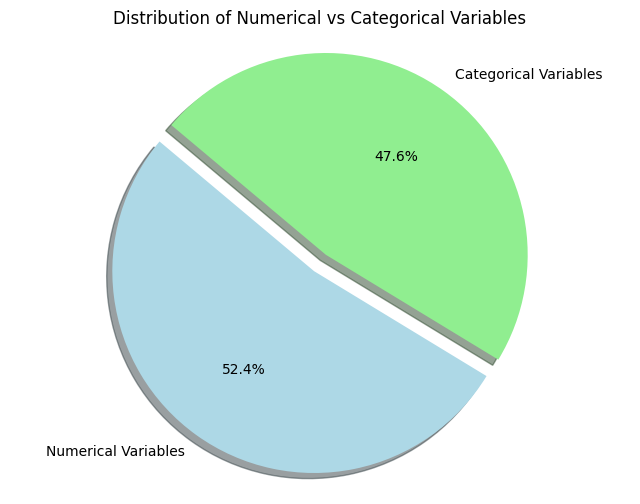

In [11]:
# Count the number of numerical and categorical variables
num_numerical_vars = len(numerical_vars)
num_categorical_vars = len(categorical_vars)

# Create a pie chart
labels = ['Numerical Variables', 'Categorical Variables']
sizes = [num_numerical_vars, num_categorical_vars]
colors = ['lightblue', 'lightgreen']
explode = (0, 0.1)  # explode the second slice (Categorical Variables)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Numerical vs Categorical Variables')
plt.show()

Above plot visualizes percentage of numerical variables and categorical variables

In [12]:
# Statistics of desired variable
df['CARS'].describe()

count    218470.000000
mean          1.316684
std           6.247457
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         182.000000
Name: CARS, dtype: float64

In [13]:

# Get descriptive statistics
stats = df['CARS'].describe()

# Convert stats to a DataFrame
stats_df = stats.to_frame().reset_index()
stats_df.columns = ['Statistic', 'Value']  

# Save to CSV file
stats_df.to_csv('cars_stats.csv', index=False)  # Save as 'cars_stats.csv'

print("Descriptive statistics saved to 'cars_stats.csv'")


Descriptive statistics saved to 'cars_stats.csv'


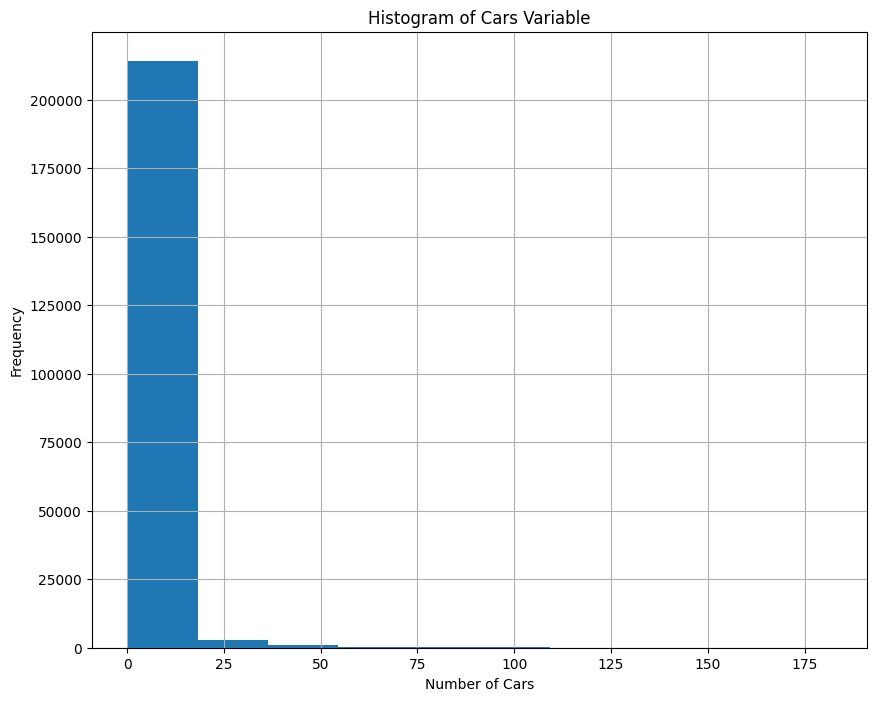

In [14]:
# Histogram of Cars variable to check on the distribution of values
histograms = df['CARS'].hist(figsize=(10, 8))
plt.xlabel('Number of Cars')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.title('Histogram of Cars Variable')  # Title for the plot
plt.show()

In [15]:
# Get the number of incidents for each number of cars
incident_counts = df['CARS'].value_counts()

# Check if there's a count for 0 cars
if 0 in incident_counts:
  number_of_zero_car_incidents = incident_counts[0]
  print(f"Number of incidents with 0 cars involved: {number_of_zero_car_incidents}")
else:
  print("There were no incidents with 0 cars involved based on the data provided.")


Number of incidents with 0 cars involved: 187716


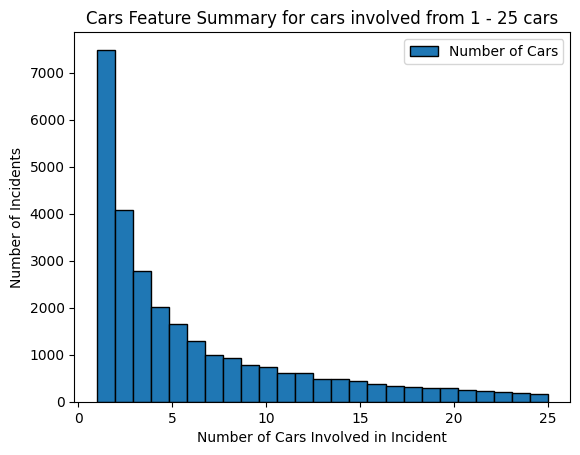

In [16]:
#Adjust the number of bins to get better visualization
bins = np.linspace(1, 25, 26)  # Creates 20 bins from 75 to 125 (inclusive)

# Histogram with labels and title
plt.hist(df['CARS'], bins=bins, edgecolor='black', label='Number of Cars')
plt.xlabel('Number of Cars Involved in Incident')
plt.ylabel('Number of Incidents')
plt.title('Cars Feature Summary for cars involved from 1 - 25 cars')
plt.legend()

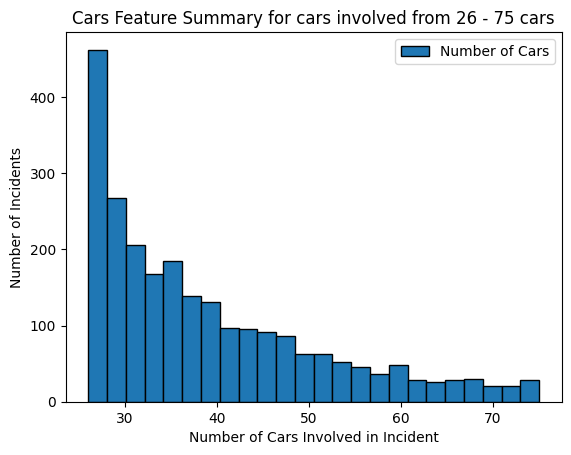

In [17]:
#Adjust the number of bins to get better visualization
bins = np.linspace(26, 75, 25)  # Creates 20 bins from 75 to 125 (inclusive)


# Histogram with labels and title
plt.hist(df['CARS'], bins=bins, edgecolor='black', label='Number of Cars')
plt.xlabel('Number of Cars Involved in Incident')
plt.ylabel('Number of Incidents')
plt.title('Cars Feature Summary for cars involved from 26 - 75 cars')
plt.legend()

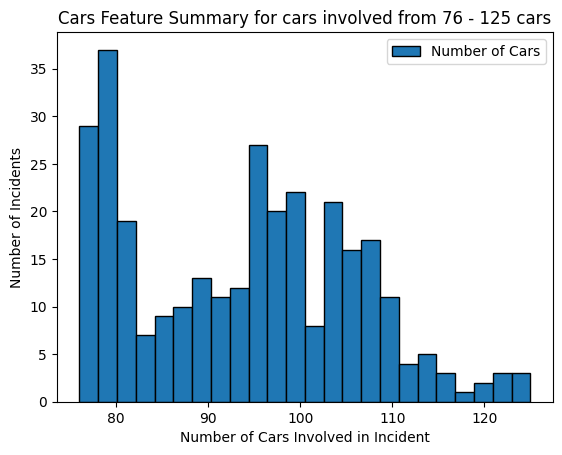

In [18]:
#Adjust the number of bins to get better visualization
bins = np.linspace(76, 125, 25)  # Creates 20 bins from 75 to 125 (inclusive)

# Histogram with labels and title
plt.hist(df['CARS'], bins=bins, edgecolor='black', label='Number of Cars')
plt.xlabel('Number of Cars Involved in Incident')
plt.ylabel('Number of Incidents')
plt.title('Cars Feature Summary for cars involved from 76 - 125 cars')
plt.legend()

In [19]:
# Get the number of incidents for each number of cars
incident_counts = df['CARS'].value_counts()

# Print the results in a clear format
print("Number of Incidents for Each Number of Cars:")
print(incident_counts)


Number of Incidents for Each Number of Cars:
CARS
0      187716
1        7489
2        4075
3        2783
4        2022
        ...  
125         1
112         1
123         1
182         1
117         1
Name: count, Length: 129, dtype: int64


In [20]:
# Get the number of incidents for each number of cars
incident_counts = df['RAILROAD'].value_counts()

# Print the results in a clear format
print("Number of Incidents for Each Number of Cars:")
print(incident_counts)

Number of Incidents for Each Number of Cars:
RAILROAD
UP      31433
BNSF    16006
CSX     13840
BN      13414
CR      12897
        ...  
TBER        1
BHP         1
VCY         1
DRWY        1
HMCR        1
Name: count, Length: 1005, dtype: int64


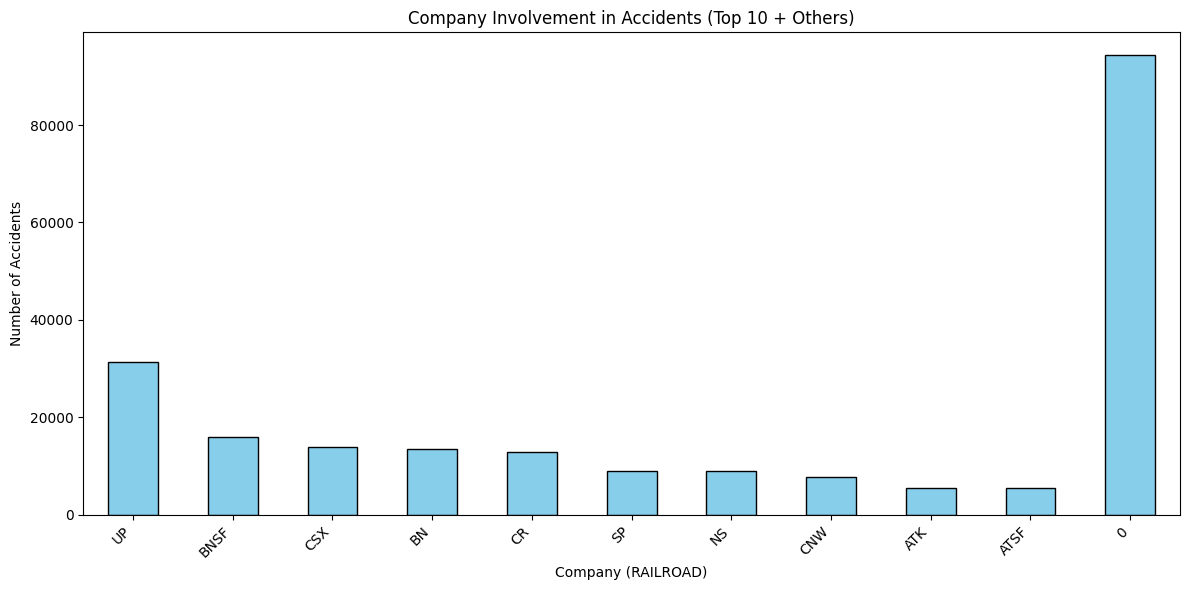

In [21]:

# Get the number of accidents for each company
company_incident_counts = df['RAILROAD'].value_counts()

# Select top 10 companies (excluding 'Others')
top_10_companies = company_incident_counts.head(10)

# Calculate total incidents for remaining companies
remaining_companies = company_incident_counts.iloc[10:].sum()

# Create a series
combined_counts = pd.concat([top_10_companies, pd.Series([remaining_companies], name='Others')])

# bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
combined_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Company (RAILROAD)')
plt.ylabel('Number of Accidents')
plt.title('Company Involvement in Accidents (Top 10 + Others)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability (optional)
plt.tight_layout()
plt.show()



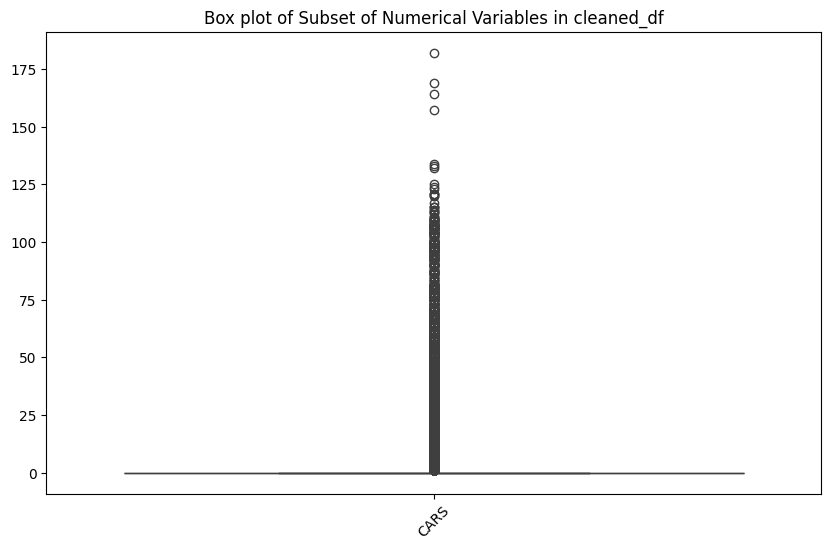

In [22]:

# Select subset of numerical variables for box plot
subset_numerical_vars = ['CARS']  # Add more variables as needed

# Plot box plots for subset of numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[subset_numerical_vars])
plt.xticks(rotation=45)
plt.title('Box plot of Subset of Numerical Variables in cleaned_df')
plt.show()


From the above plot we can analyse, few number of cars were involved in incidents.

Below is the Summay for all remaining numerical variables

In [23]:
# Calculate descriptive statistics for numerical variables
#.describe() is a method used to generate descriptive statistics
numerical_stats = df[numerical_vars].describe()

# print numerical_stats
print(numerical_stats)

                 IYR            IMO          IYR2          IMO2  \
count  218470.000000  218470.000000  18977.000000  18977.000000   
mean       58.715403       6.436129     58.588976      6.448596   
std        35.326709       3.450530     35.201920      3.455466   
min         0.000000       1.000000      0.000000      1.000000   
25%        16.000000       3.000000     16.000000      3.000000   
50%        78.000000       6.000000     77.000000      6.000000   
75%        84.000000       9.000000     83.000000      9.000000   
max        99.000000      12.000000     99.000000     12.000000   

                IYR3           IMO3           YEAR          MONTH  \
count  218459.000000  218459.000000  218470.000000  218470.000000   
mean       58.717256       6.436077      58.715403       6.436083   
std        35.326632       3.450541      35.326709       3.450522   
min         0.000000       1.000000       0.000000       1.000000   
25%        16.000000       3.000000      16.000000 

## Exploratory Data Analysis

In [24]:
# Check for null values in the dataset
null_values = df.isnull().sum()

# Display columns with null values, if any
null_values[null_values > 0]


IYR2        199493
IMO2        199493
RR2         199490
INCDTNO2    199490
IYR3            11
             ...  
MOPERA      187142
ADJUNCT1    197785
ADJUNCT2    216094
ADJUNCT3    217820
SUBDIV      187155
Length: 90, dtype: int64

In [25]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

#print missing_percentage
print(missing_percentage)

IYR          0.000000
IMO          0.000000
RAILROAD     0.000000
INCDTNO      0.000000
IYR2        91.313682
              ...    
MOPERA      85.660274
ADJUNCT1    90.531881
ADJUNCT2    98.912436
ADJUNCT3    99.702476
SUBDIV      85.666224
Length: 145, dtype: float64


In [26]:
# Identify columns with missing values exceeding 20%
columns_to_drop = missing_percentage[missing_percentage > 20].index

#print columns_to_drop
print(columns_to_drop)

Index(['IYR2', 'IMO2', 'RR2', 'INCDTNO2', 'DUMMY1', 'GXID', 'TRKDNSTY',
       'RRCAR2', 'CARNBR2', 'POSITON2', 'LOADED2', 'CAUSE2', 'DUMMY2',
       'DUMMY3', 'ENGHR', 'ENGMIN', 'CDTRHR', 'CDTRMIN', 'DUMMY4', 'DUMMY5',
       'DUMMY6', 'ALCOHOL', 'DRUG', 'DUMMY7', 'SSB1', 'SSB2', 'NARR1', 'NARR2',
       'NARR3', 'NARR4', 'NARR5', 'NARR6', 'NARR7', 'NARR8', 'NARR9', 'NARR10',
       'NARR11', 'NARR12', 'NARR13', 'NARR14', 'NARR15', 'RCL', 'Latitude',
       'Longitud', 'SIGNAL', 'MOPERA', 'ADJUNCT1', 'ADJUNCT2', 'ADJUNCT3',
       'SUBDIV'],
      dtype='object')


In [27]:
# Find the shape of the dataframe before dropping any columns
df.shape

(218470, 145)

In [28]:
# Drop the identified columns from the dataset
# Lets name this new dataframe as cleaned_df
cleaned_df = df.drop(columns=columns_to_drop)
cleaned_df

,IYR,IMO,RAILROAD,INCDTNO,IYR3,IMO3,RR3,INCDTNO3,YEAR,MONTH,...,YEAR4,RREMPKLD,RREMPINJ,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,COUNTY,CNTYCD,PASSTRN
0,21,8,ARR,2021118,21.0,8.0,ARR,2021118,21,8,...,2021,0,0,0,0,0,0,MATANUSKA SUSITNA,170.0,N
1,21,4,ARR,2021075,21.0,4.0,ARR,2021075,21,4,...,2021,0,0,0,0,0,0,FAIRBANKS NORTH STAR,90.0,N
2,7,1,IC,543854,7.0,1.0,CAEZ,INDUSTRY,7,1,...,2007,0,0,0,0,0,0,ST JOHN THE BAPTIST,95.0,N
3,20,2,ARR,2020027,20.0,2.0,ARR,2020027,20,2,...,2020,0,0,0,0,0,0,DENALI,68.0,N
4,21,7,ALE,2102DERAIL,21.0,7.0,ALE,2102DERAIL,21,7,...,2021,0,0,0,0,0,0,MOBILE,97.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218465,5,12,INRD,643082,5.0,12.0,INRD,643082,5,12,...,2005,0,0,0,0,0,0,GREENE,55.0,N
218466,5,2,IOCR,ID05081,5.0,2.0,IOCR,ID05081,5,2,...,2005,0,0,0,0,0,0,CLINTON,27.0,N
218467,5,3,IOCR,ID05130,5.0,3.0,IOCR,ID05130,5,3,...,2005,0,0,0,0,0,0,FAIRFIELD,45.0,N
218468,5,3,IOCR,ID05134,5.0,3.0,IOCR,ID05134,5,3,...,2005,0,0,0,0,0,0,FAYETTE,47.0,N


In [29]:
# Now find the shape of the dataframe, after dropping unwanted columns
cleaned_df.shape

(218470, 95)

In [30]:
cleaned_df.to_csv("cleaned_df.csv")

In [31]:
# Check the number of missing values for each variable
missing_values = cleaned_df.isnull().sum()
print(missing_values)


IYR             0
IMO             0
RAILROAD        0
INCDTNO         0
IYR3           11
            ...  
OTHERKLD        0
OTHERINJ        0
COUNTY       3619
CNTYCD       3624
PASSTRN     10845
Length: 95, dtype: int64


In [32]:
# Total sum of missing values of all the variables
missing_values_total = cleaned_df.isnull().sum().sum()
print("Total number of null values:", missing_values_total)


Total number of null values: 487089


## Handling Missing Values

In [33]:
# Fill missing values for numerical variables with median
numerical_vars = cleaned_df.select_dtypes(include=['int64', 'float64']).columns
cleaned_df[numerical_vars] = cleaned_df[numerical_vars].fillna(cleaned_df[numerical_vars].median())


In [34]:
# Fill missing values for categorical variables with mode
categorical_vars = cleaned_df.select_dtypes(include=['object', 'category']).columns
cleaned_df[categorical_vars] = cleaned_df[categorical_vars].fillna(cleaned_df[categorical_vars].mode().iloc[0])

In [35]:
missing_values = cleaned_df.isnull().sum()
print(missing_values)

IYR         0
IMO         0
RAILROAD    0
INCDTNO     0
IYR3        0
           ..
OTHERKLD    0
OTHERINJ    0
COUNTY      0
CNTYCD      0
PASSTRN     0
Length: 95, dtype: int64


In [36]:
total_missing = cleaned_df.isnull().sum().sum()
print("Total number of missing values:", total_missing)

Total number of missing values: 0


## Handling Outliers

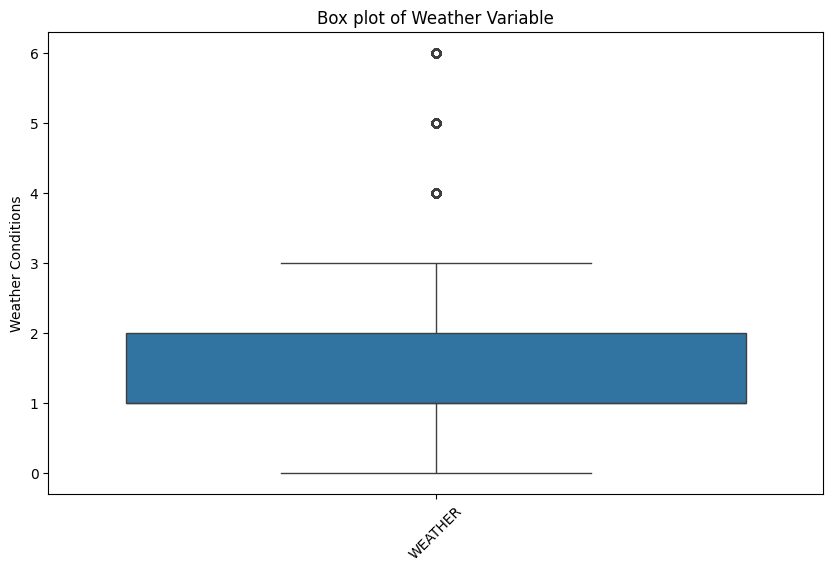

In [37]:

# Select subset of numerical variables for box plot
subset_numerical_vars = ['WEATHER']  

# Plot box plots for subset of numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_df[subset_numerical_vars])
plt.xticks(rotation=45)
plt.title('Box plot of Weather Variable')
plt.ylabel('Weather Conditions')
plt.show()

# Any datapoints outside the whiskers are usually outliers



## Removing Outliers

In [38]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = cleaned_df['WEATHER'].quantile(0.25)
Q3 = cleaned_df['WEATHER'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = cleaned_df[(cleaned_df['WEATHER'] < lower_bound) | (cleaned_df['WEATHER'] > upper_bound)]

# Remove outliers
cleaned_df = cleaned_df[(cleaned_df['WEATHER'] >= lower_bound) & (cleaned_df['WEATHER'] <= upper_bound)]


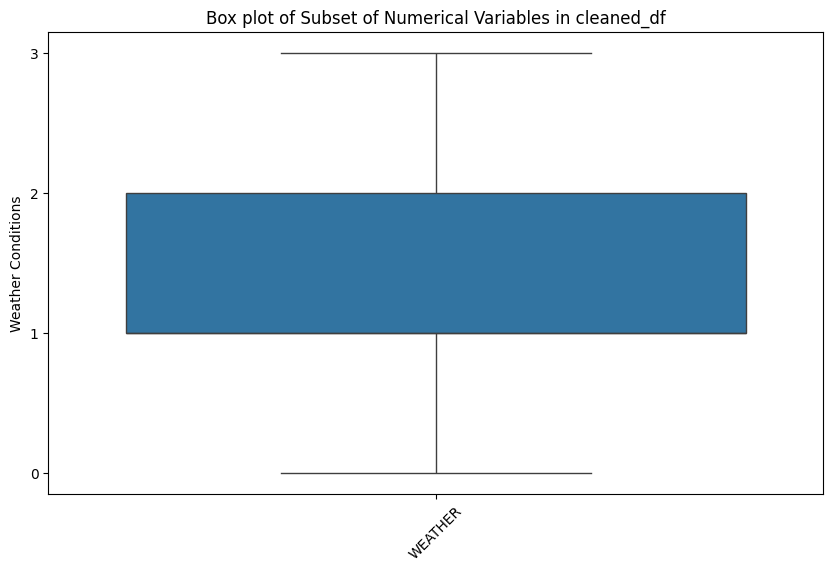

In [39]:

# Select subset of numerical variables for box plot
subset_numerical_vars = ['WEATHER']  # Add more variables as needed

# Plot box plots for subset of numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_df[subset_numerical_vars])
plt.xticks(rotation=45)
plt.title('Box plot of Subset of Numerical Variables in cleaned_df')
plt.ylabel('Weather Conditions')

# Set y-axis 
plt.yticks(range(4)) 
plt.show()

In the above plot, we can observe there are no outliers. We can do the same process with all the variables, and treat the outliers if there are any.

## Univariate Analysis & Bivariate Analysis

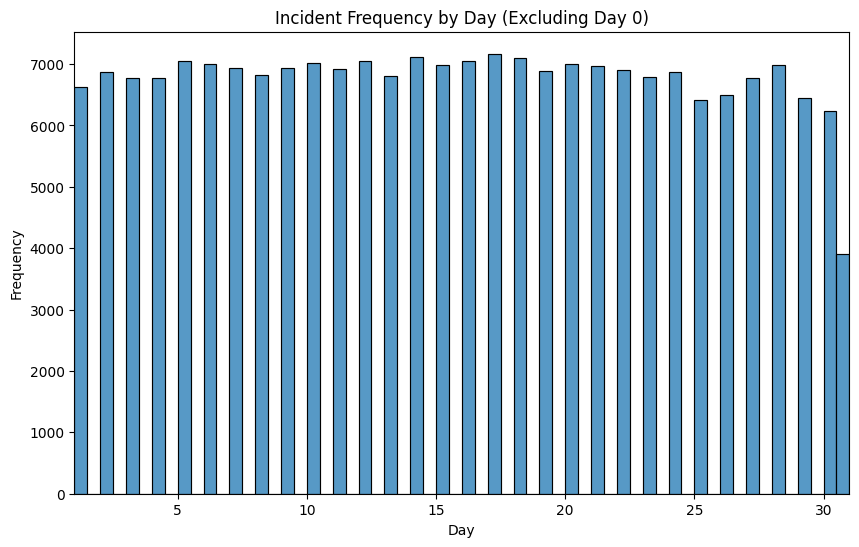

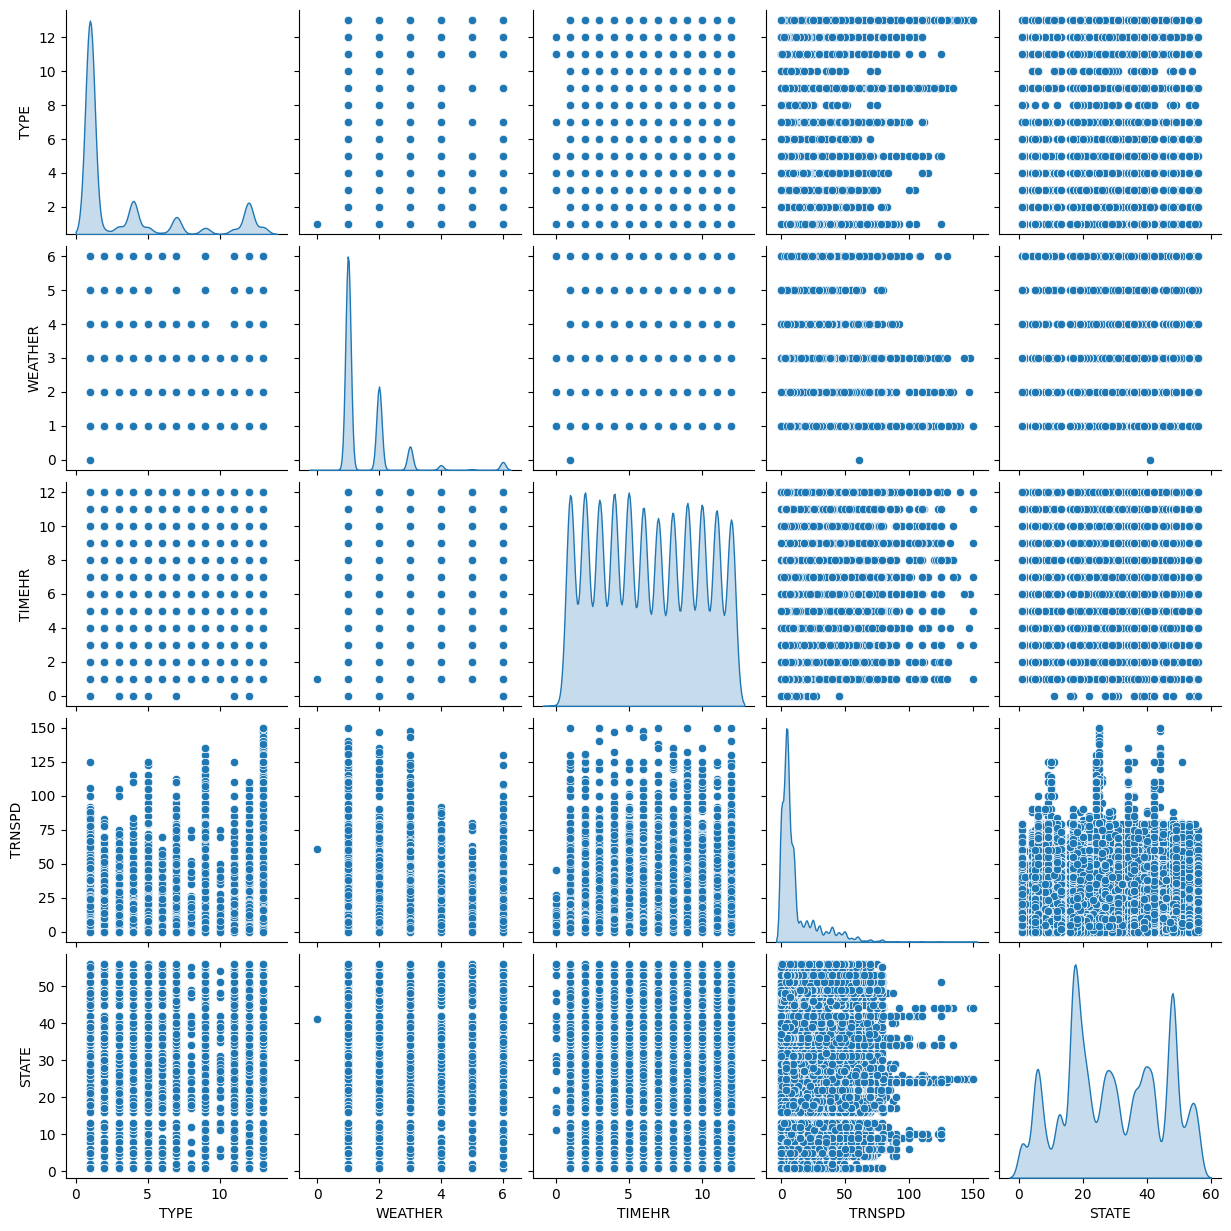

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out days with value 0
filtered_days = cleaned_df[cleaned_df['DAY'] != 0]['DAY']

# Visualize incident frequency over days
plt.figure(figsize=(10, 6))
sns.histplot(filtered_days)
plt.title('Incident Frequency by Day (Excluding Day 0)')
plt.xlabel('Day')
plt.ylabel('Frequency')

# Set x-axis limits excluding 0
plt.xlim(filtered_days.min(), filtered_days.max())

plt.show()

# Explore relationships between variables
sns.pairplot(df[['TYPE', 'WEATHER', 'TIMEHR', 'TRNSPD', 'STATE', 'TYPTRK']], diag_kind='kde')
plt.show()


Above plot visualizes that incidents were uniformly distributed all over the month, other than first couple of days of the month

In [41]:
# Pick some important variables, depending on our objective and goals
selected_columns = ['WEATHER', 'TIMEHR', 'TIMEMIN', 'TRNSPD', 'STATE', 'MILEPOST','TYPTRK']

In [42]:
column_types = cleaned_df[selected_columns].dtypes

print(column_types)

WEATHER     float64
TIMEHR      float64
TIMEMIN     float64
TRNSPD      float64
STATE         int64
MILEPOST     object
TYPTRK       object
dtype: object


In [43]:
# Convert the data type from object to float
columns_to_convert = ['MILEPOST', 'TYPTRK']

In [44]:
# Convert columns to numeric
cleaned_df.loc[:, columns_to_convert] = cleaned_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Convert columns to float
cleaned_df.loc[:, columns_to_convert] = cleaned_df[columns_to_convert].astype(float)

In [45]:
# Check data type after changing to float

column_types = cleaned_df[selected_columns].dtypes

print(column_types)

WEATHER     float64
TIMEHR      float64
TIMEMIN     float64
TRNSPD      float64
STATE         int64
MILEPOST     object
TYPTRK       object
dtype: object


In [46]:
# As we changed the data type, there could be null values, which need to be treated

null_counts = cleaned_df.loc[:, selected_columns].isnull().sum()
print(null_counts)

WEATHER         0
TIMEHR          0
TIMEMIN         0
TRNSPD          0
STATE           0
MILEPOST    20371
TYPTRK          1
dtype: int64


In [47]:
# Fill the null values with mean
# Apply the Imputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in selected columns
cleaned_df.loc[:, selected_columns] = imputer.fit_transform(cleaned_df.loc[:, selected_columns])

In [48]:
# Checking null values again, after filling them with mean
null_counts = cleaned_df.loc[:, selected_columns].isnull().sum()
print(null_counts)

WEATHER     0
TIMEHR      0
TIMEMIN     0
TRNSPD      0
STATE       0
MILEPOST    0
TYPTRK      0
dtype: int64


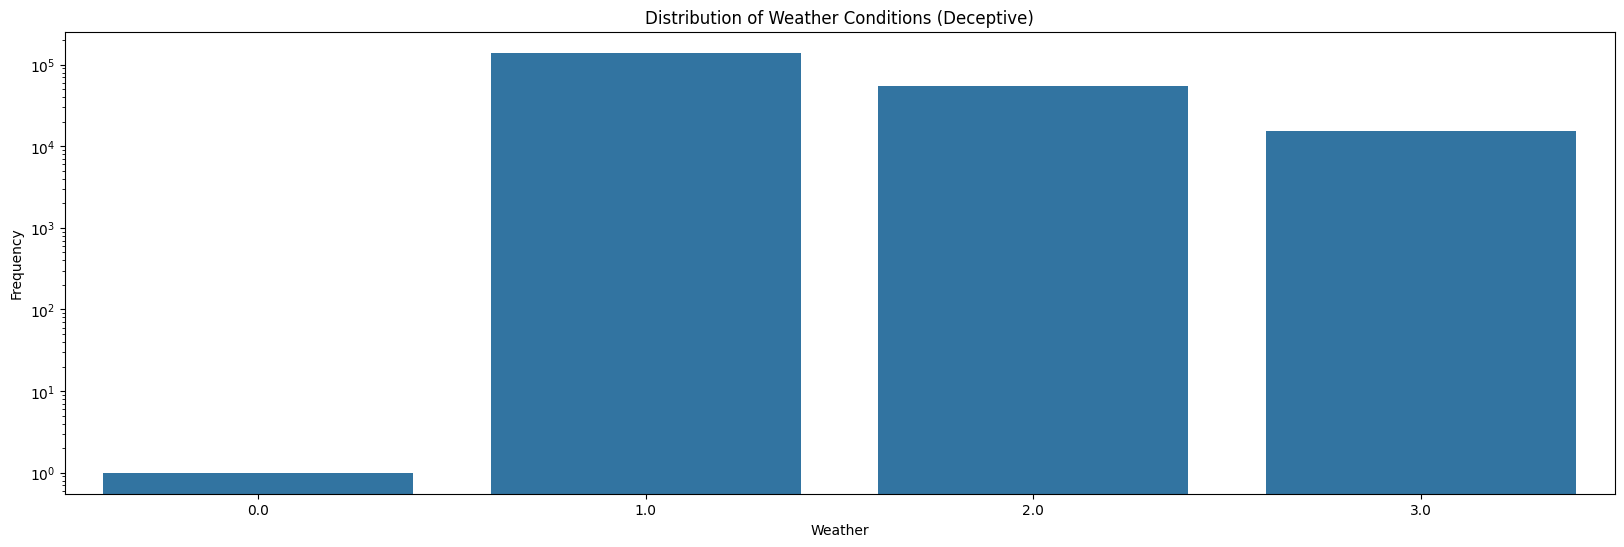

In [49]:
# Create a bar plot with deceptive scaling
plt.figure(figsize=(20, 6))
sns.countplot(x='WEATHER', data=cleaned_df)
plt.title('Distribution of Weather Conditions (Deceptive)')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.yscale('log')  # Deceptive scaling
plt.show()

Above plot describes that very few incidents happen when weather condition is 0, or else incidents are quite high.

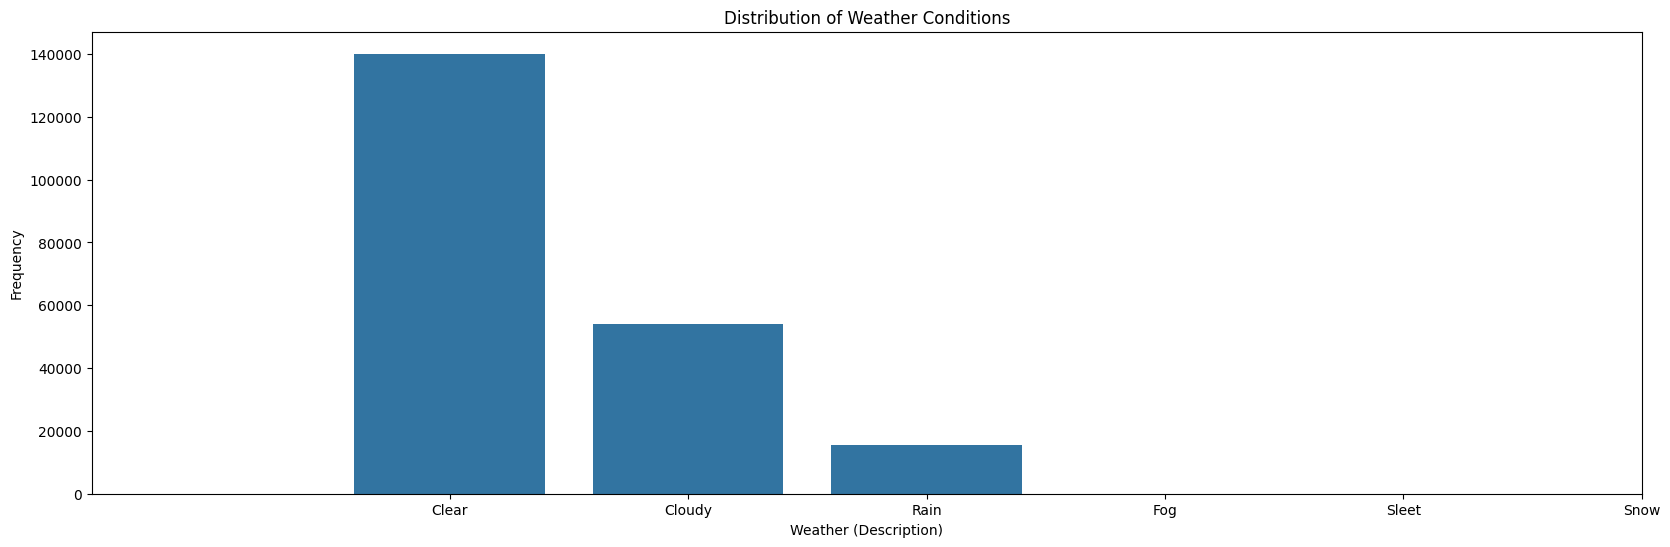

In [50]:
# Define weather descriptions
weather_descriptions = {
    1: "Clear",
    2: "Cloudy",
    3: "Rain",
    4: "Fog",
    5: "Sleet",
    6: "Snow",
}

# Plot with deceptive scaling
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='WEATHER', data=cleaned_df)
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather (Description)')
plt.ylabel('Frequency')

# Set custom x-axis labels
ax.set_xticks(list(weather_descriptions.keys()))
ax.set_xticklabels(list(weather_descriptions.values()))

# plt.yscale('log')  # Deceptive scaling
plt.show()


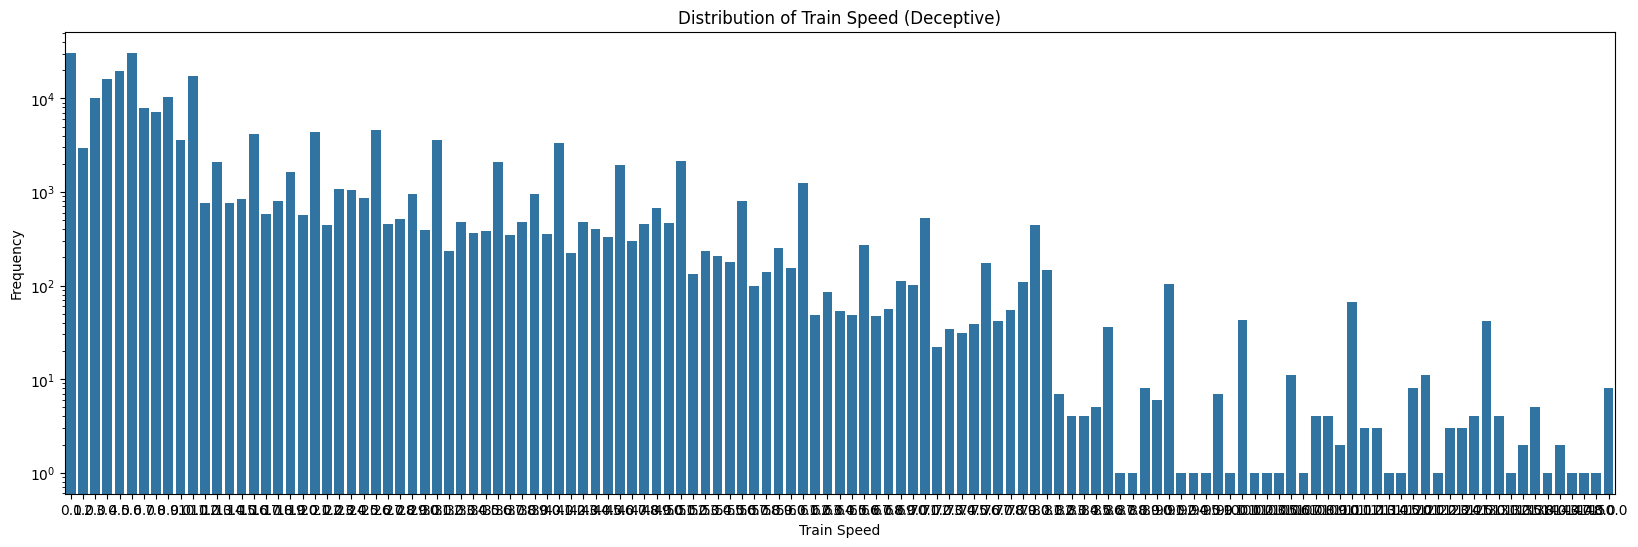

In [51]:
# Bar plot with deceptive scaling for Train Speed
plt.figure(figsize=(20, 6))
sns.countplot(x='TRNSPD', data=cleaned_df)
plt.title('Distribution of Train Speed (Deceptive)')
plt.xlabel('Train Speed')
plt.ylabel('Frequency')
plt.yscale('log')  # Deceptive scaling
plt.show()

C:\Users\Personal Machine\AppData\Local\Temp\ipykernel_16628\554935733.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



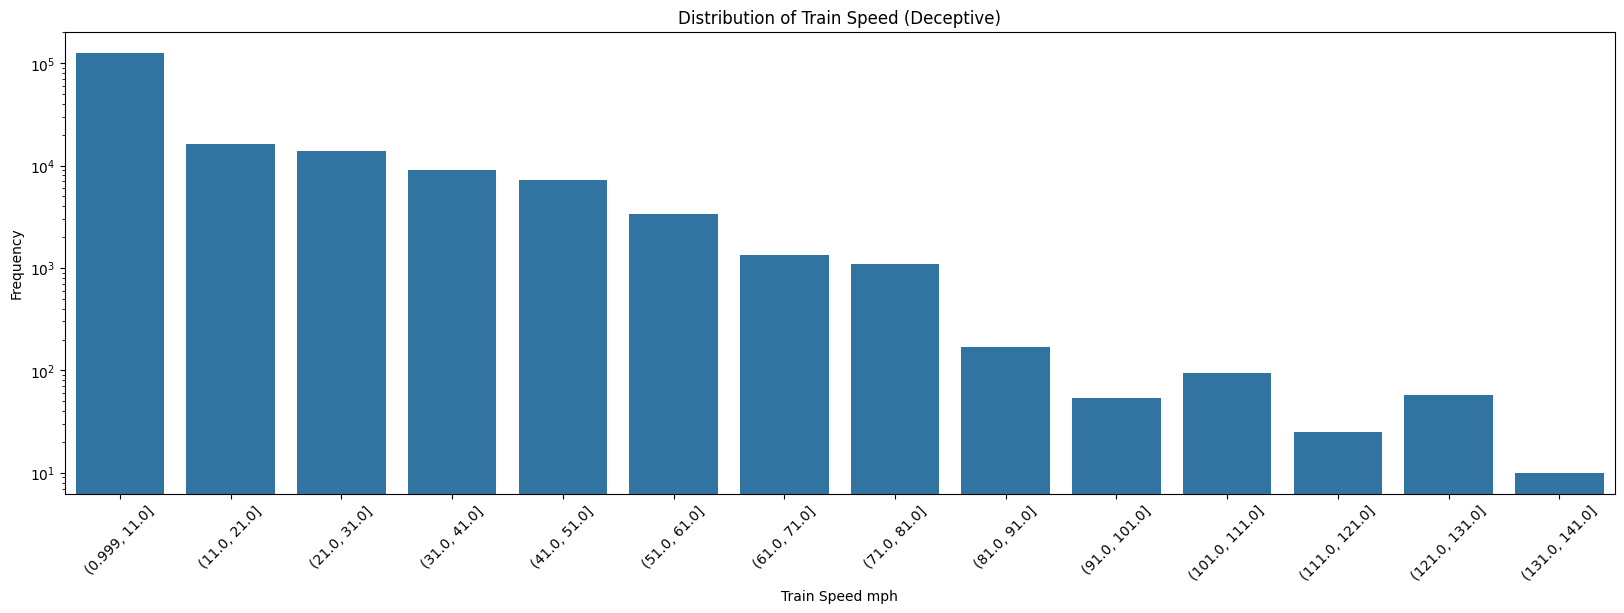

In [52]:
# In the above plot,as x-axis scale is not clearly visible, let try to do by using bins
# Define bins for train speed
bins = np.arange(1, 151, 10)

# Create a new column in the DataFrame indicating the bin for each train speed value
cleaned_df.loc[:, 'Speed_Bin'] = pd.cut(cleaned_df['TRNSPD'], bins=bins, include_lowest=True)

# Create the bar plot with deceptive scaling
plt.figure(figsize=(20, 6))
sns.countplot(x='Speed_Bin', data=cleaned_df)
plt.title('Distribution of Train Speed (Deceptive)')
plt.xlabel('Train Speed mph')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yscale('log')  # Deceptive scaling
plt.show()

# Below plot gives better analysis where most of the incidents occur when the train speed is lower.

As per above plot, frequency of incidents were more when train speed is lower

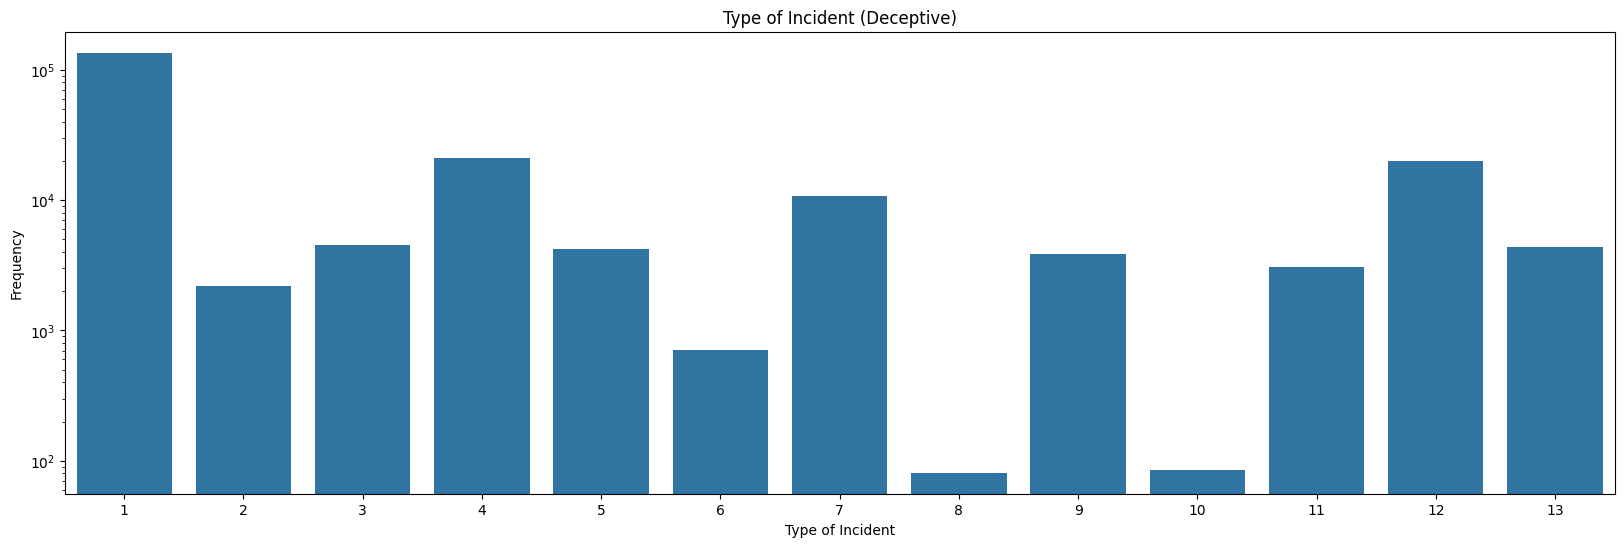

In [53]:
# Plot showing for type of incident and frequency
plt.figure(figsize=(20, 6))
sns.countplot(x='TYPE', data=cleaned_df)
plt.title('Type of Incident (Deceptive)')
plt.xlabel('Type of Incident')
plt.ylabel('Frequency')
plt.yscale('log')  # Deceptive scaling
plt.show()

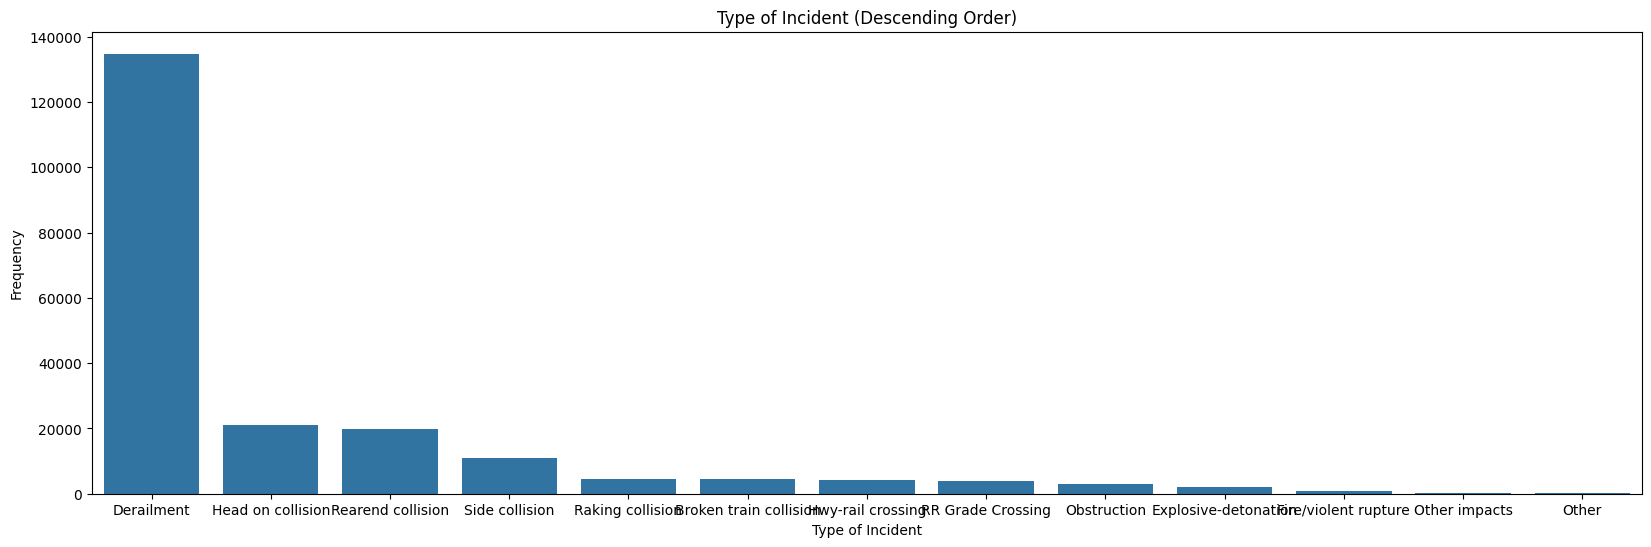

In [54]:
# Define descriptions for each type of incident
incident_descriptions = {
    '01': 'Derailment',
    '02': 'Head on collision',
    '03': 'Rearend collision',
    '04': 'Side collision',
    '05': 'Raking collision',
    '06': 'Broken train collision',
    '07': 'Hwy-rail crossing',
    '08': 'RR Grade Crossing',
    '09': 'Obstruction',
    '10': 'Explosive-detonation',
    '11': 'Fire/violent rupture',
    '12': 'Other impacts',
    '13': 'Other'
}

# Calculate frequency of each type of incident
incident_counts = cleaned_df['TYPE'].value_counts()

# Sort the incidents based on frequency in descending order
sorted_incidents = incident_counts.sort_values(ascending=False)

# Plot showing for type of incident and frequency
plt.figure(figsize=(20, 6))
sns.countplot(x='TYPE', data=cleaned_df, order=sorted_incidents.index)
plt.title('Type of Incident (Descending Order)')
plt.xlabel('Type of Incident')
plt.ylabel('Frequency')

# Update x-axis labels with descriptions
plt.xticks(ticks=range(len(incident_descriptions)), labels=incident_descriptions.values())

# plt.yscale('log')  # Deceptive scaling
plt.show()


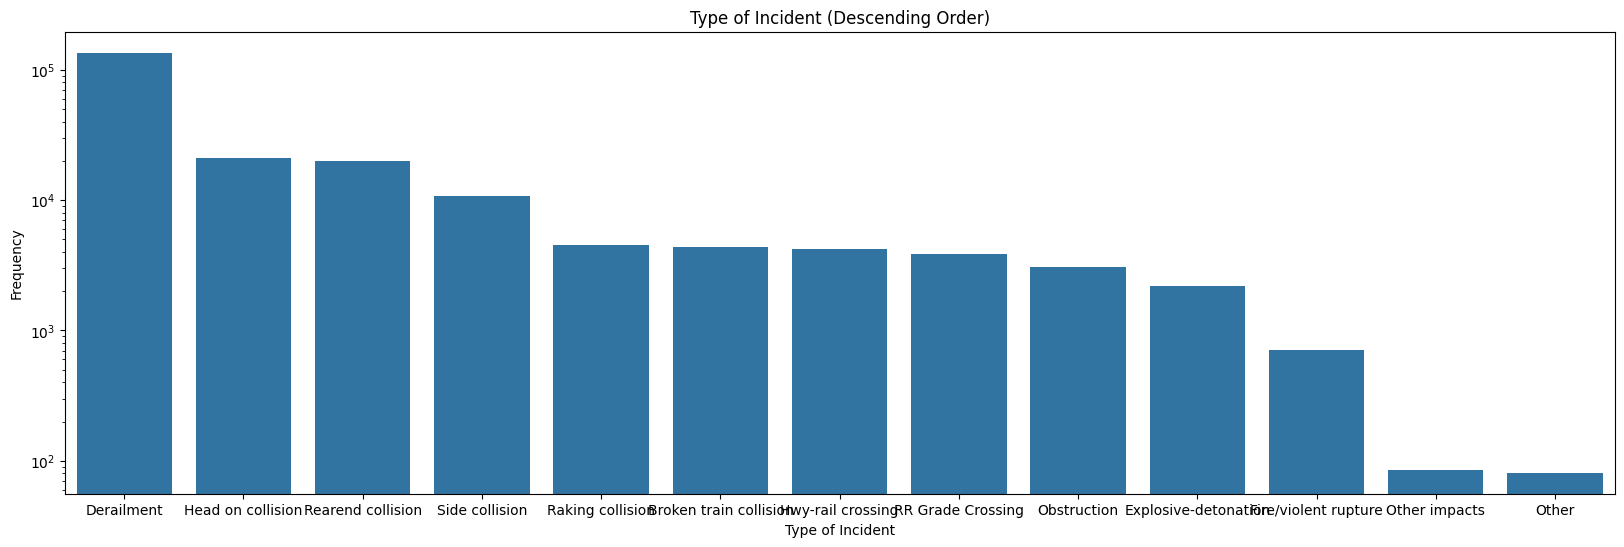

In [55]:

# Calculate frequency of each type of incident
incident_counts = cleaned_df['TYPE'].value_counts()

# Sort the incidents based on frequency in descending order
sorted_incidents = incident_counts.sort_values(ascending=False)

# Plot showing for type of incident and frequency
plt.figure(figsize=(20, 6))
sns.countplot(x='TYPE', data=cleaned_df, order=sorted_incidents.index)
plt.title('Type of Incident (Descending Order)')
plt.xlabel('Type of Incident')
plt.ylabel('Frequency')

# Update x-axis labels with descriptions
plt.xticks(ticks=range(len(incident_descriptions)), labels=incident_descriptions.values())

plt.yscale('log')  # Deceptive scaling
plt.show()


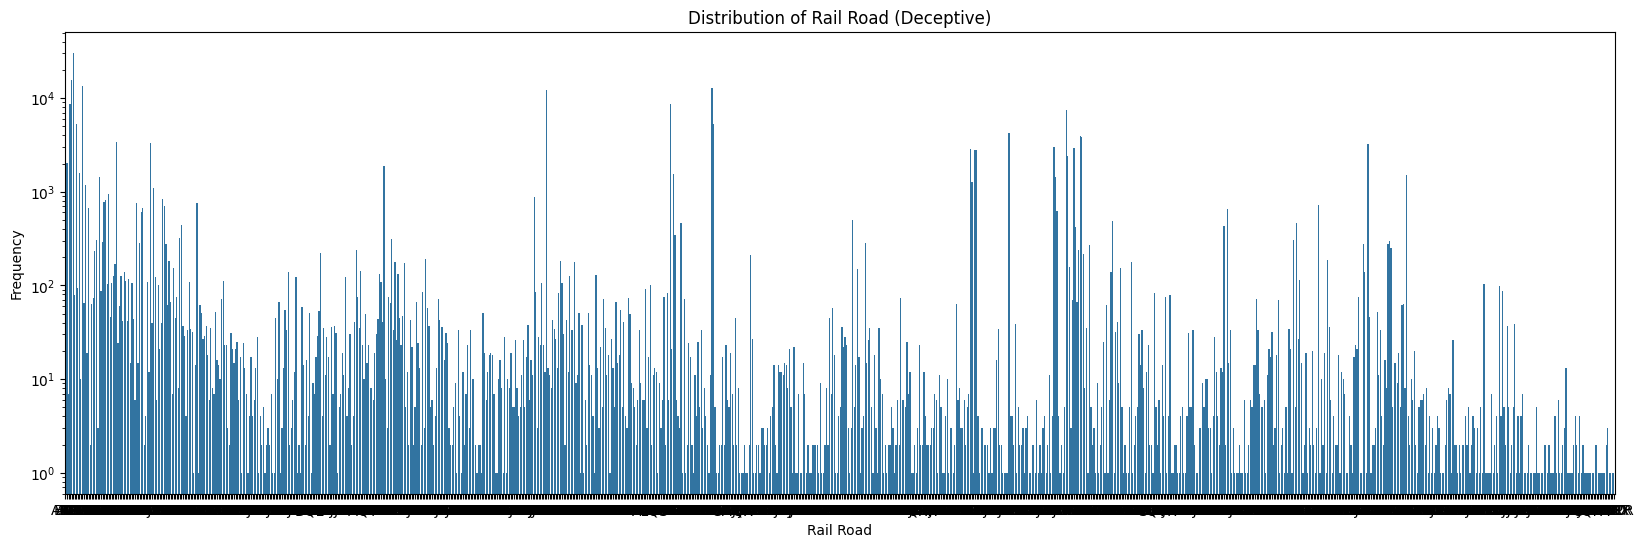

In [56]:
# This plot doesnt give good visualization to find out which rail road firm is involved in more incidents
plt.figure(figsize=(20, 6))
sns.countplot(x='RAILROAD', data=cleaned_df)
plt.title('Distribution of Rail Road (Deceptive)')
plt.xlabel('Rail Road')
plt.ylabel('Frequency')
plt.yscale('log')  # Deceptive scaling
plt.show()

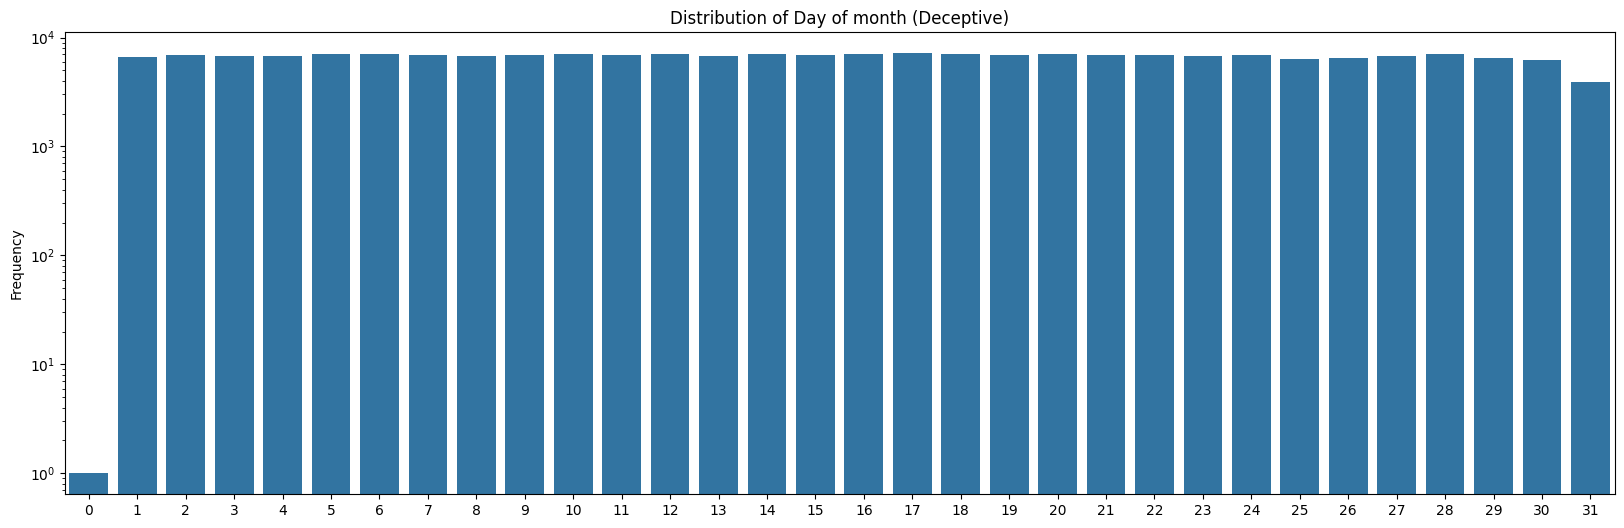

In [57]:
# Plot to visualize day of the month and frquency of incidents

plt.figure(figsize=(20, 6))
sns.countplot(x='DAY', data=cleaned_df)
plt.title('Distribution of Day of month (Deceptive)')
plt.xlabel('')
plt.ylabel('Frequency')
plt.yscale('log')  # Deceptive scaling
plt.show()

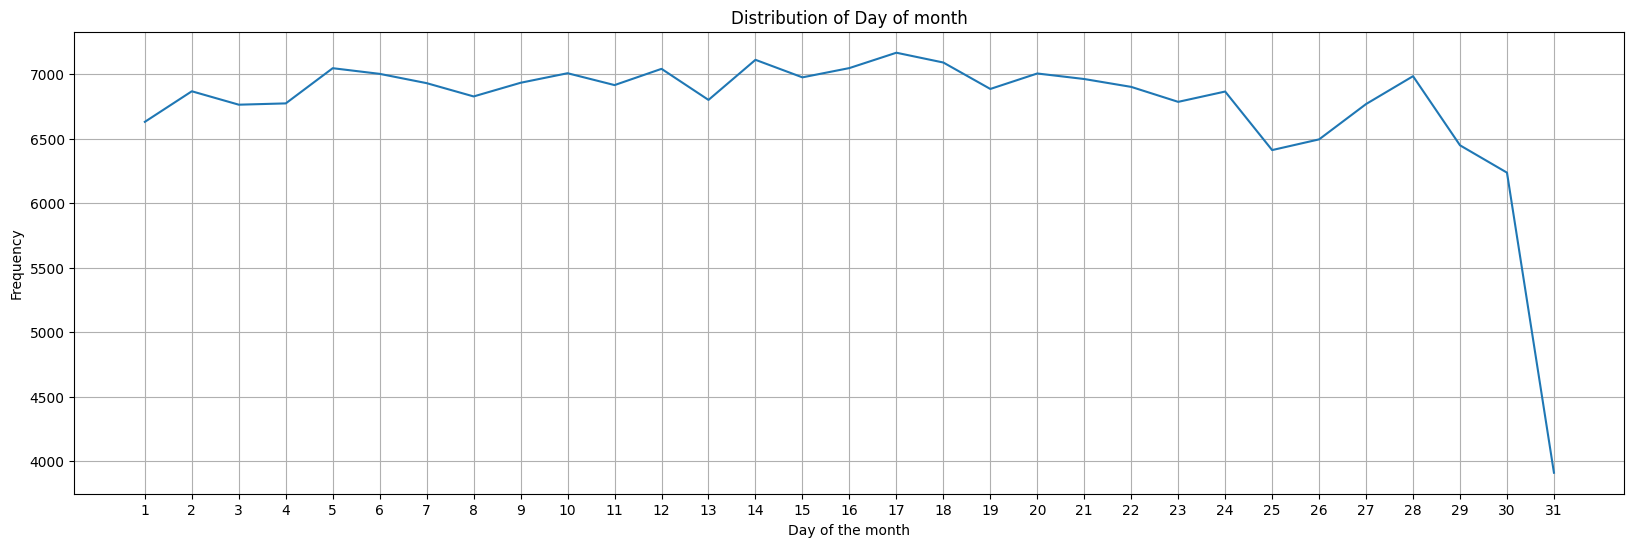

In [58]:
# Filter out rows where DAY is 0
cleaned_df1 = cleaned_df[cleaned_df['DAY'] != 0]

plt.figure(figsize=(20, 6))
sns.lineplot(x='DAY', y='Frequency', data=cleaned_df1.groupby('DAY').size().reset_index(name='Frequency'))
plt.title('Distribution of Day of month')
plt.xlabel('Day of the month')
plt.ylabel('Frequency')
plt.xticks(range(1, 32))  # Assuming days range from 1 to 31
plt.grid(True)  # Add grid for better readability
plt.show()




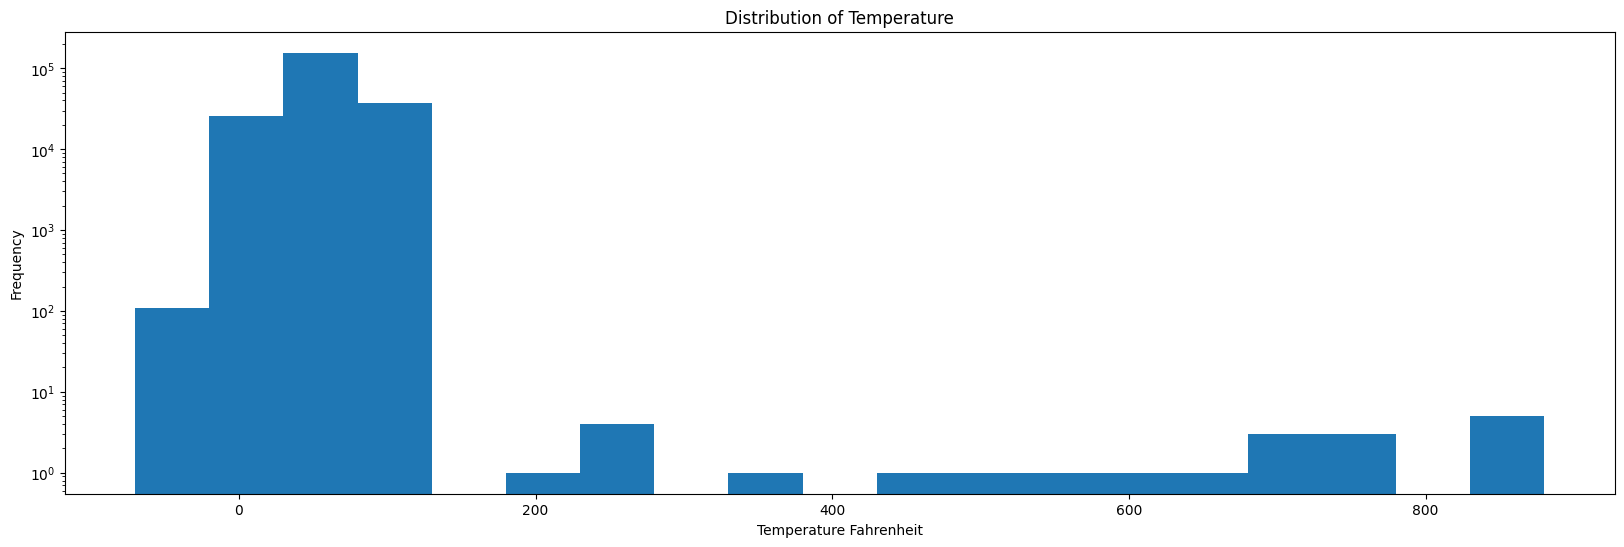

In [59]:
# Plot to visualize Distribution of temperature and frequency of incidents

plt.figure(figsize=(20, 6))
bins = np.arange(-70, 900, 50)  # Adjust bin width as needed
plt.hist(df['TEMP'], bins=bins)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature Fahrenheit')
plt.ylabel('Frequency')
plt.yscale('log')  # Deceptive scaling
plt.show()

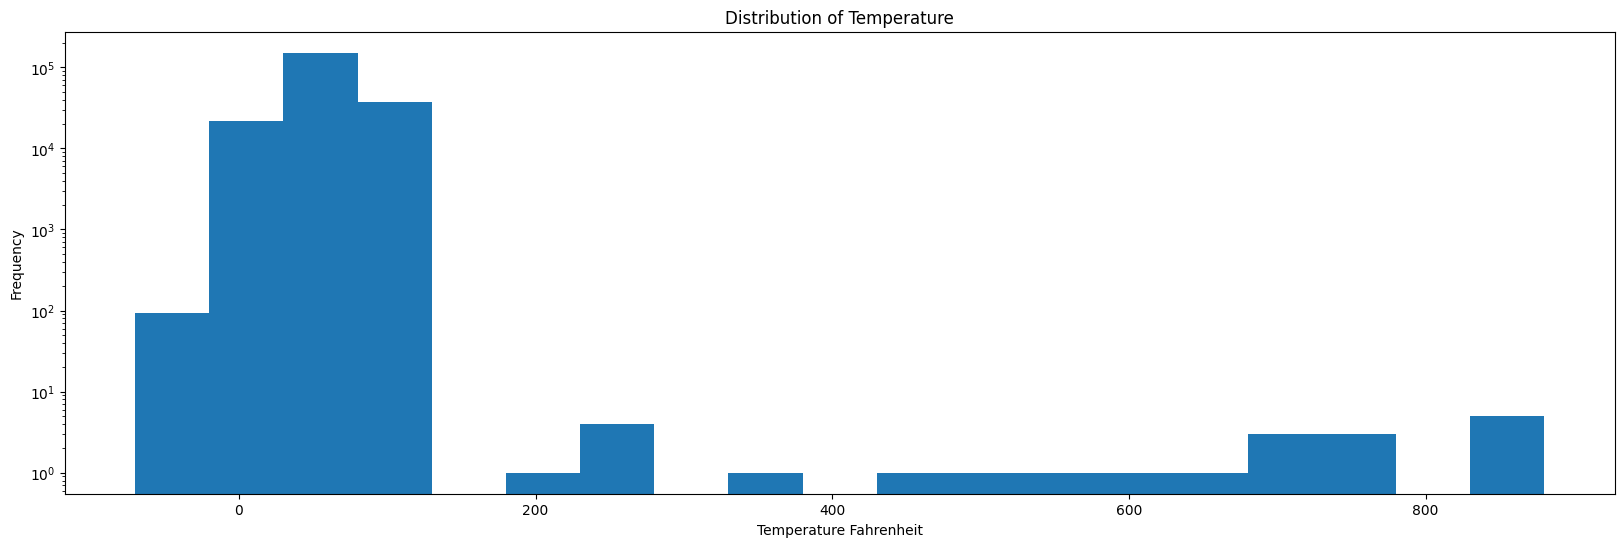

In [60]:
# Plot to visualize Distribution of temperature and frequency of incidents

plt.figure(figsize=(20, 6))
bins = np.arange(-70, 900, 50)  # Adjust bin width as needed
plt.hist(cleaned_df['TEMP'], bins=bins)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature Fahrenheit')
plt.ylabel('Frequency')
plt.yscale('log')  # Deceptive scaling
plt.show()

Above plot, we can observe outliers, so have to remove them

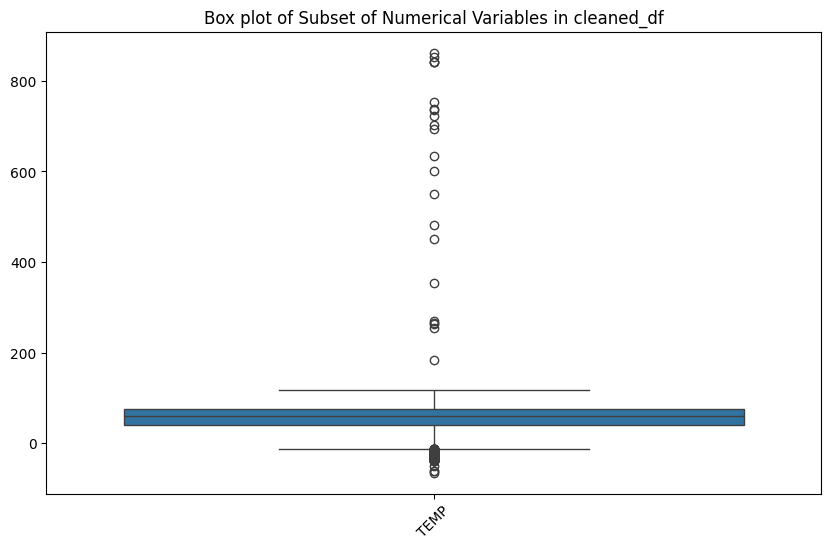

In [61]:
subset_numerical_vars1 = ['TEMP']  # Add more variables as needed

# Plot box plot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_df[subset_numerical_vars1])
plt.xticks(rotation=45)
plt.title('Box plot of Subset of Numerical Variables in cleaned_df')
plt.show()

# Any datapoints outside the whiskers are usually outliers

In [62]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = cleaned_df['TEMP'].quantile(0.25)
Q3 = cleaned_df['TEMP'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = cleaned_df[(cleaned_df['TEMP'] < lower_bound) | (cleaned_df['TEMP'] > upper_bound)]

# Remove outliers
cleaned_df = cleaned_df[(cleaned_df['TEMP'] >= lower_bound) & (cleaned_df['TEMP'] <= upper_bound)]

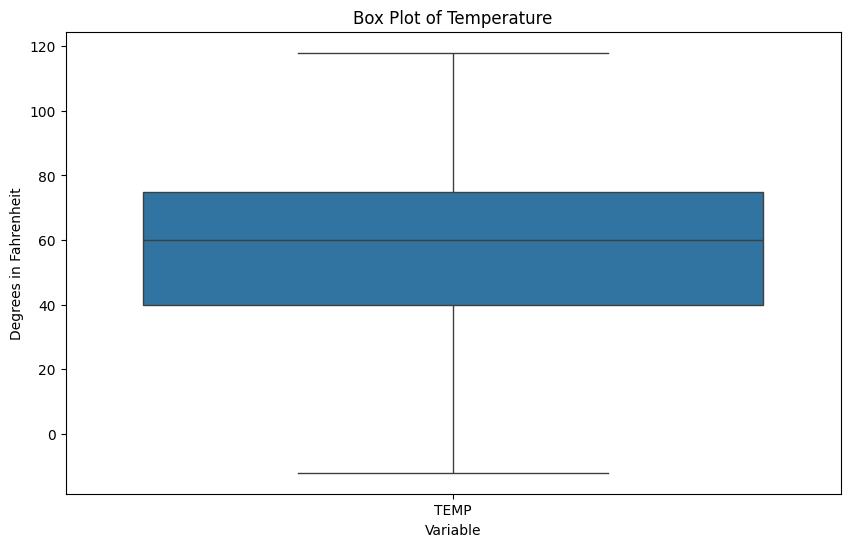

In [63]:
# Plot size
plt.figure(figsize=(10, 6))

# Create box plots 
sns.boxplot(data=cleaned_df[['TEMP']])

# Set plot title and labels
plt.title('Box Plot of Temperature')
plt.xlabel('Variable')
plt.ylabel('Degrees in Fahrenheit')

# Show plot
plt.show()

# Any datapoints outside the whiskers are usually outliers. Now below we can observe that there are no more outliers

In [64]:
# Statistics of desired variable
cleaned_df['TEMP'].describe()

count    209275.000000
mean         57.193788
std          21.666887
min         -12.000000
25%          40.000000
50%          60.000000
75%          75.000000
max         118.000000
Name: TEMP, dtype: float64

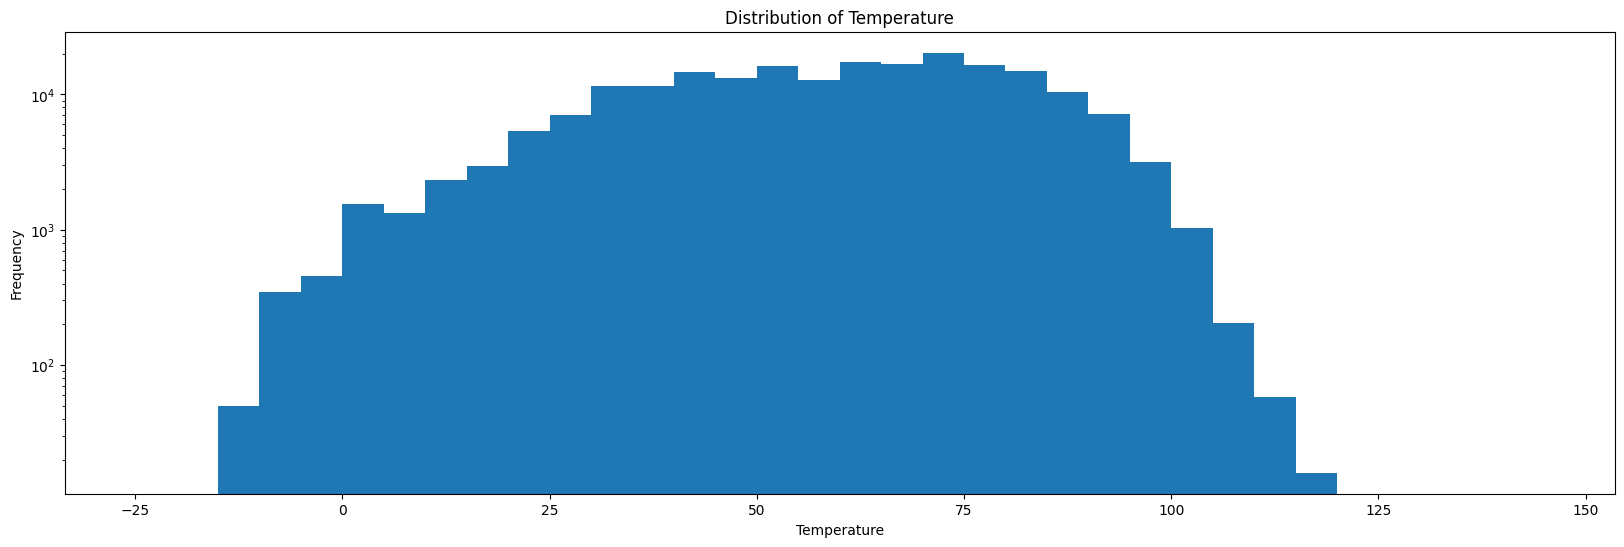

In [65]:
# Plot to visualize distribution of temperature

plt.figure(figsize=(20, 6))
bins = np.arange(-25, 150, 5)  # Adjust bin width as needed
plt.hist(cleaned_df['TEMP'], bins=bins)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.yscale('log')  # Deceptive scaling
plt.show()

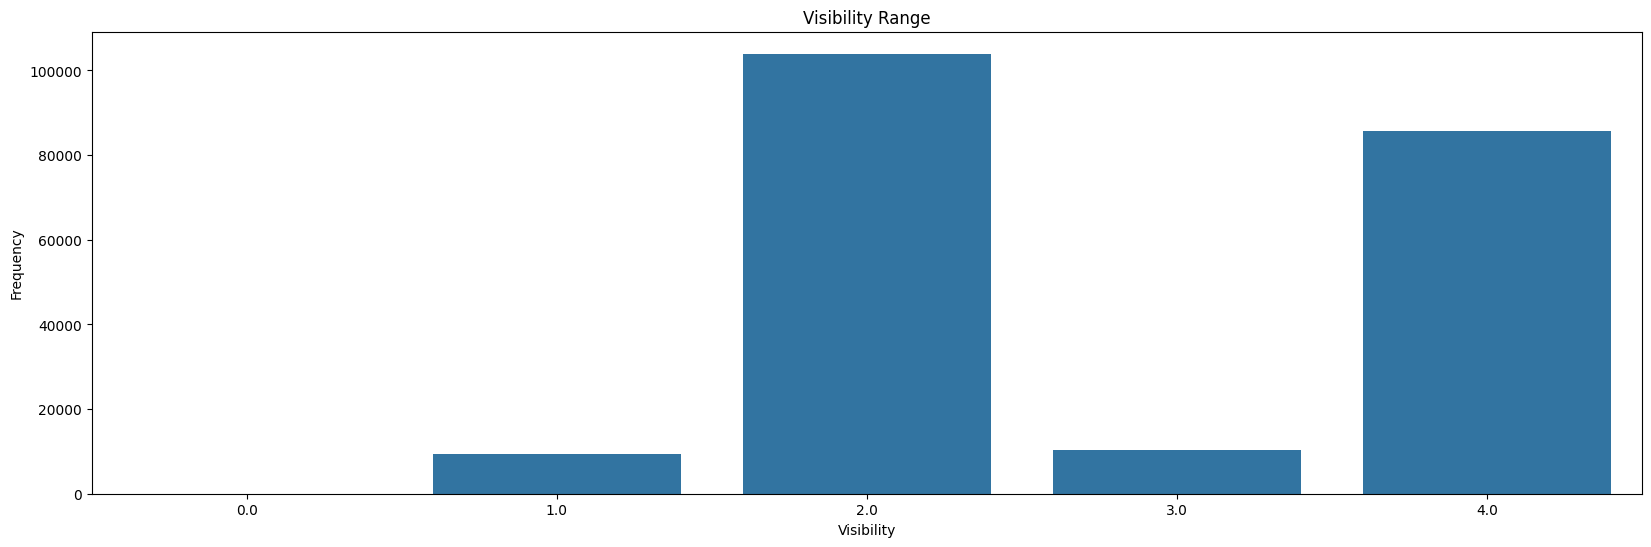

In [66]:
# Plot showing for Visibility
plt.figure(figsize=(20, 6))
sns.countplot(x='VISIBLTY', data=cleaned_df)
plt.title('Visibility Range')
plt.xlabel('Visibility')
plt.ylabel('Frequency')

plt.show()

In [67]:
print(cleaned_df['VISIBLTY'].unique())

[2. 3. 4. 1. 0.]


C:\Users\Personal Machine\AppData\Local\Temp\ipykernel_16628\3626404936.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



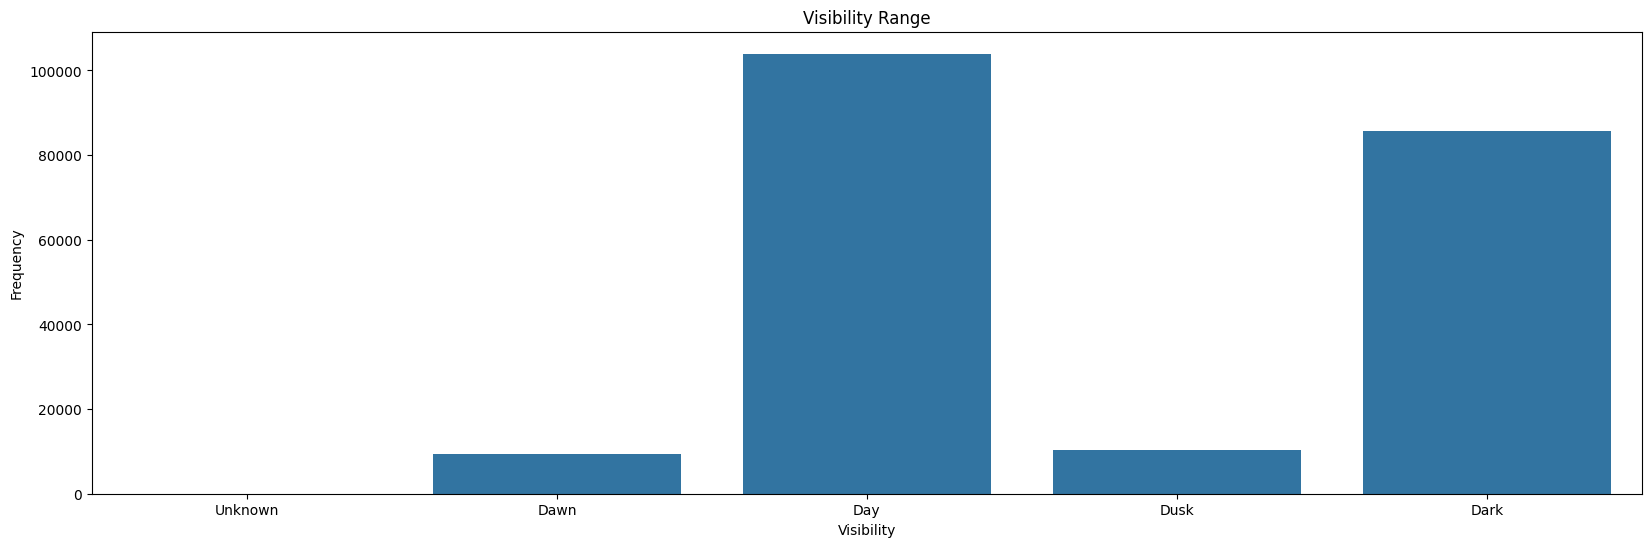

In [68]:
# Convert 'VISIBLTY' to integer type
cleaned_df['VISIBLTY'] = cleaned_df['VISIBLTY'].astype(int)
# Define visibility descriptions
visibility_descriptions = {
    0: "Unknown",  # Add a description for 0
    1: "Dawn",
    2: "Day",
    3: "Dusk",
    4: "Dark",
}

# Plot showing for Visibility
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='VISIBLTY', data=cleaned_df, order=visibility_descriptions.keys())  # Specify order
plt.title('Visibility Range')
plt.xlabel('Visibility')  # Label will be overwritten with descriptions
ax.set_xticklabels(visibility_descriptions.values())  # Set custom x-axis labels
plt.ylabel('Frequency')
plt.show()



C:\Users\Personal Machine\AppData\Local\Temp\ipykernel_16628\1844355724.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



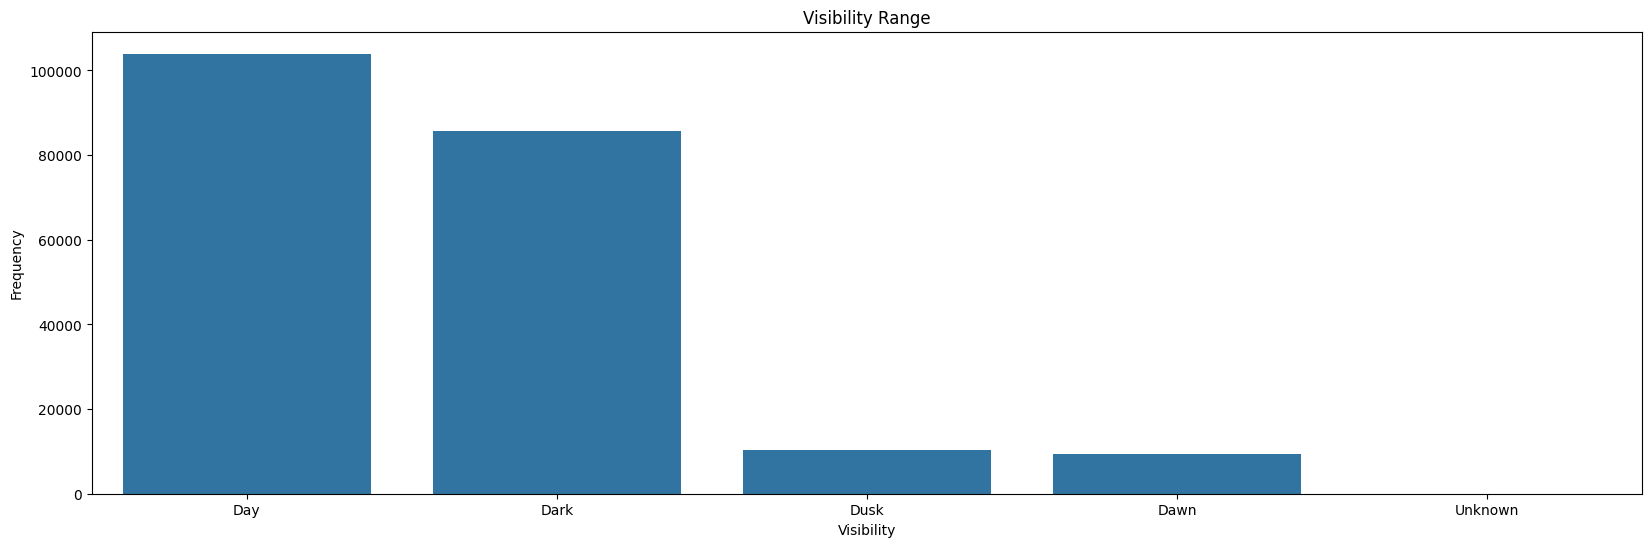

In [69]:
# Convert 'VISIBLTY' to integer type
cleaned_df['VISIBLTY'] = cleaned_df['VISIBLTY'].astype(int)

# Define visibility descriptions
visibility_descriptions = {
    0: "Unknown",  # Add a description for 0
    1: "Dawn",
    2: "Day",
    3: "Dusk",
    4: "Dark",
}

# Plot showing for Visibility
plt.figure(figsize=(20, 6))

# Count the occurrences of each visibility category
visibility_counts = cleaned_df['VISIBLTY'].value_counts()

# Sort the visibility categories based on frequency in descending order
sorted_visibility_descriptions = {k: visibility_descriptions[k] for k in visibility_counts.index}

# Plot the countplot in descending order
ax = sns.countplot(x='VISIBLTY', data=cleaned_df, order=sorted_visibility_descriptions.keys())  
plt.title('Visibility Range')
plt.xlabel('Visibility')  
ax.set_xticklabels(sorted_visibility_descriptions.values())  
plt.ylabel('Frequency')
plt.show()


In [70]:
print(cleaned_df['VISIBLTY'].unique())


[2 3 4 1 0]


In [71]:
print(cleaned_df['VISIBLTY'].dtype)

int32


In [72]:
print(cleaned_df.head())

   IYR  IMO RAILROAD     INCDTNO  IYR3  IMO3   RR3    INCDTNO3  YEAR  MONTH  \
0   21    8      ARR     2021118  21.0   8.0   ARR     2021118    21      8   
1   21    4      ARR     2021075  21.0   4.0   ARR     2021075    21      4   
2    7    1       IC      543854   7.0   1.0  CAEZ    INDUSTRY     7      1   
4   21    7      ALE  2102DERAIL  21.0   7.0   ALE  2102DERAIL    21      7   
5   23    4       NS      152740  23.0   4.0    NS      152740    23      4   

   ...  RREMPKLD  RREMPINJ  PASSKLD PASSINJ  OTHERKLD  OTHERINJ  \
0  ...         0         0        0       0         0         0   
1  ...         0         0        0       0         0         0   
2  ...         0         0        0       0         0         0   
4  ...         0         0        0       0         0         0   
5  ...         0         0        0       0         0         0   

                 COUNTY  CNTYCD PASSTRN      Speed_Bin  
0     MATANUSKA SUSITNA   170.0       N            NaN  
1  FAIRB

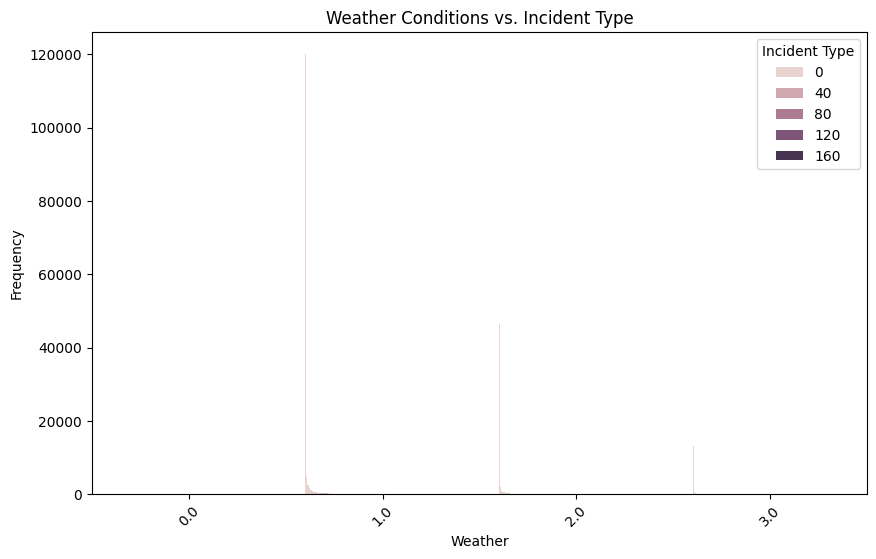

In [73]:
# Relationship between weather conditions and incident type
plt.figure(figsize=(10, 6))
sns.countplot(x='WEATHER', hue='CARS', data=cleaned_df)
plt.title('Weather Conditions vs. Incident Type')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.legend(title='Incident Type')
plt.xticks(rotation=45)
plt.show()

C:\Users\Personal Machine\AppData\Local\Temp\ipykernel_16628\3582638515.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



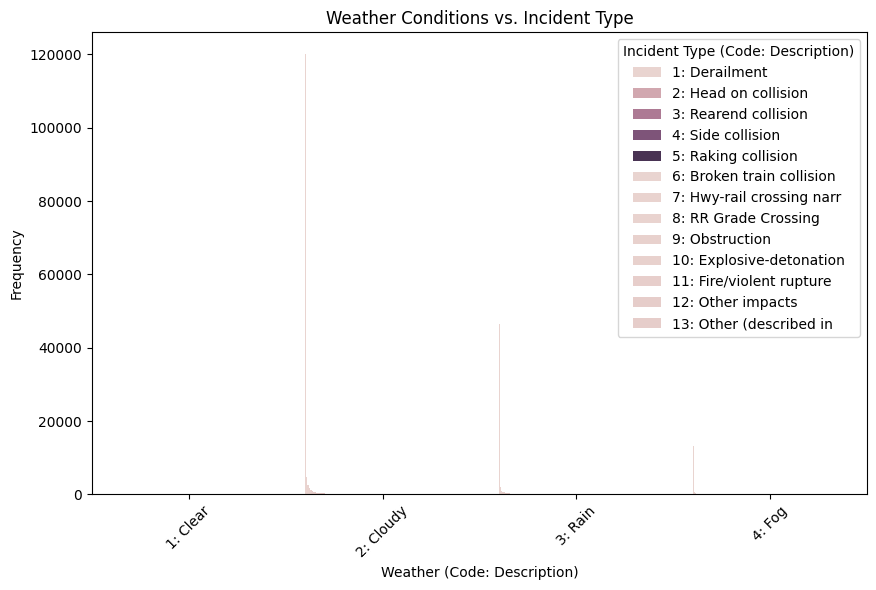

In [74]:
# Define descriptions for weather conditions and incident types
weather_descriptions = {
    1: "Clear",
    2: "Cloudy",
    3: "Rain",
    4: "Fog",
    5: "Sleet",
    6: "Snow",
}

incident_type_descriptions = {
    1: "Derailment",
    2: "Head on collision",
    3: "Rearend collision",
    4: "Side collision",
    5: "Raking collision",
    6: "Broken train collision",
    7: "Hwy-rail crossing narr",
    8: "RR Grade Crossing",
    9: "Obstruction",
    10: "Explosive-detonation",
    11: "Fire/violent rupture",
    12: "Other impacts",
    13: "Other (described in",
}

# Plot showing relationship between weather conditions and incident type
# Plot showing relationship between weather conditions and incident type
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='WEATHER', hue='CARS', data=cleaned_df)
plt.title('Weather Conditions vs. Incident Type')
plt.xlabel('Weather (Code: Description)')
plt.ylabel('Frequency')
plt.legend(title='Incident Type (Code: Description)', loc='upper right')
plt.xticks(rotation=45)

# Add descriptions to the x-axis and legend
ax.set_xticklabels([f"{key}: {val}" for key, val in weather_descriptions.items()], rotation=45)
plt.legend(title='Incident Type (Code: Description)', loc='upper right',
           labels=[f"{key}: {val}" for key, val in incident_type_descriptions.items()])
plt.show()


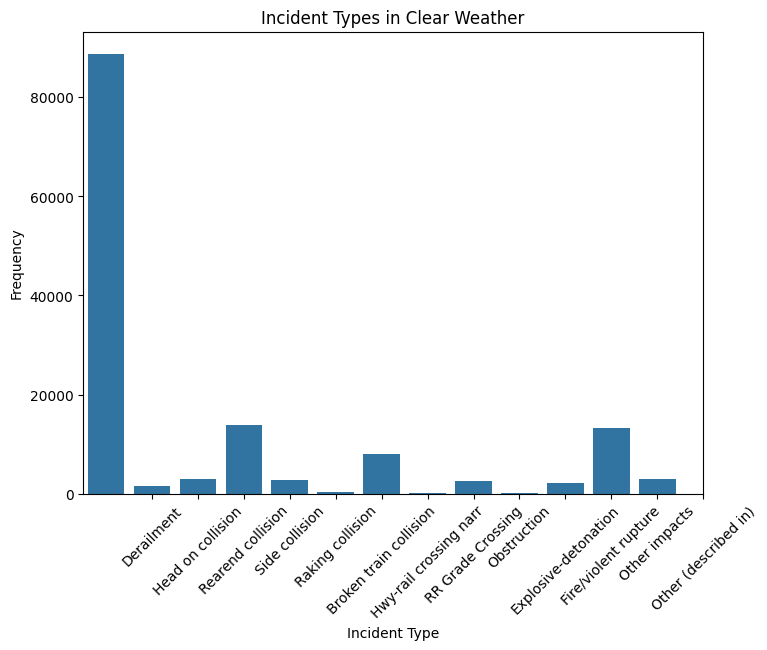

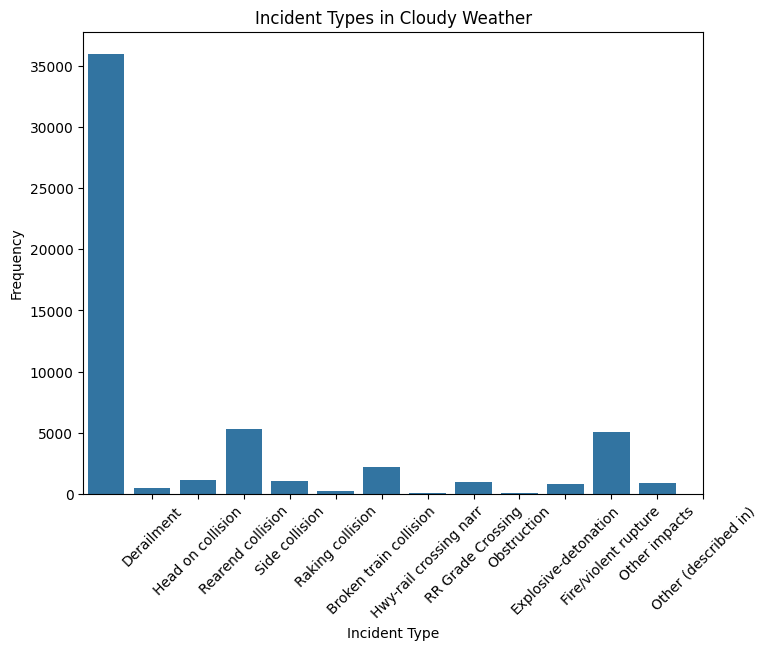

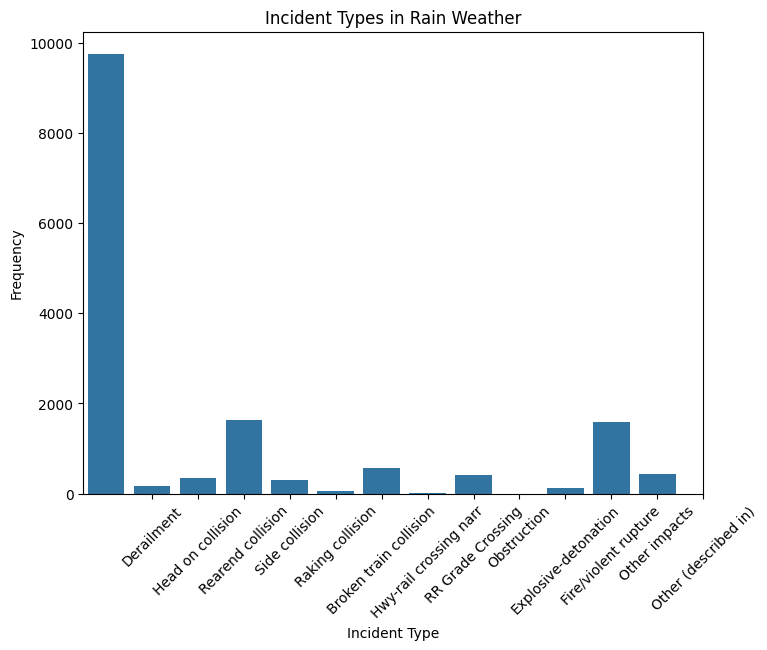

In [75]:
# Define descriptions for weather conditions and incident types
weather_descriptions = {
    1: "Clear",
    2: "Cloudy",
    3: "Rain",
    4: "Fog",
}

incident_type_descriptions = {
    1: "Derailment",
    2: "Head on collision",
    3: "Rearend collision",
    4: "Side collision",
    5: "Raking collision",
    6: "Broken train collision",
    7: "Hwy-rail crossing narr",
    8: "RR Grade Crossing",
    9: "Obstruction",
    10: "Explosive-detonation",
    11: "Fire/violent rupture",
    12: "Other impacts",
    13: "Other (described in)",
}

# Filter dataset for each weather condition
clear_weather_df = cleaned_df[cleaned_df['WEATHER'] == 1]
cloudy_weather_df = cleaned_df[cleaned_df['WEATHER'] == 2]
rain_weather_df = cleaned_df[cleaned_df['WEATHER'] == 3]


# Define function to plot incident type for a specific weather condition
def plot_weather_incidents(weather_df, weather_description):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='TYPE', data=weather_df)
    plt.title(f'Incident Types in {weather_description} Weather')
    plt.xlabel('Incident Type')
    plt.ylabel('Frequency')
    ax = plt.gca()
    ax.set_xticks(list(incident_type_descriptions.keys()))
    ax.set_xticklabels(list(incident_type_descriptions.values()), rotation=45)
    plt.show()

# Plot for Clear Weather
plot_weather_incidents(clear_weather_df, weather_descriptions[1])

# Plot for Cloudy Weather
plot_weather_incidents(cloudy_weather_df, weather_descriptions[2])

# Plot for Rain Weather
plot_weather_incidents(rain_weather_df, weather_descriptions[3])


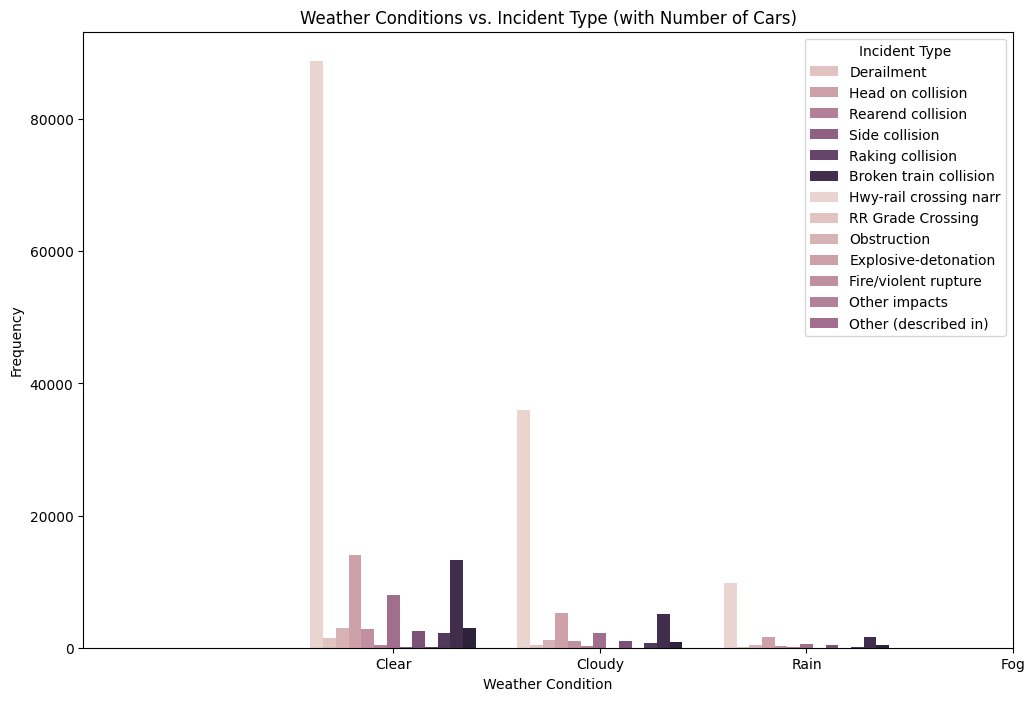

In [76]:
# Plotting bivariate analysis for all weather conditions
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='WEATHER', hue='TYPE', data=cleaned_df, hue_order=incident_type_descriptions.keys())
plt.title('Weather Conditions vs. Incident Type (with Number of Cars)')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.legend(title='Incident Type', loc='upper right', labels=incident_type_descriptions.values())
ax.set_xticks(list(weather_descriptions.keys()))
ax.set_xticklabels(list(weather_descriptions.values()))
plt.show()


C:\Users\Personal Machine\AppData\Local\Temp\ipykernel_16628\1986522536.py:39: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



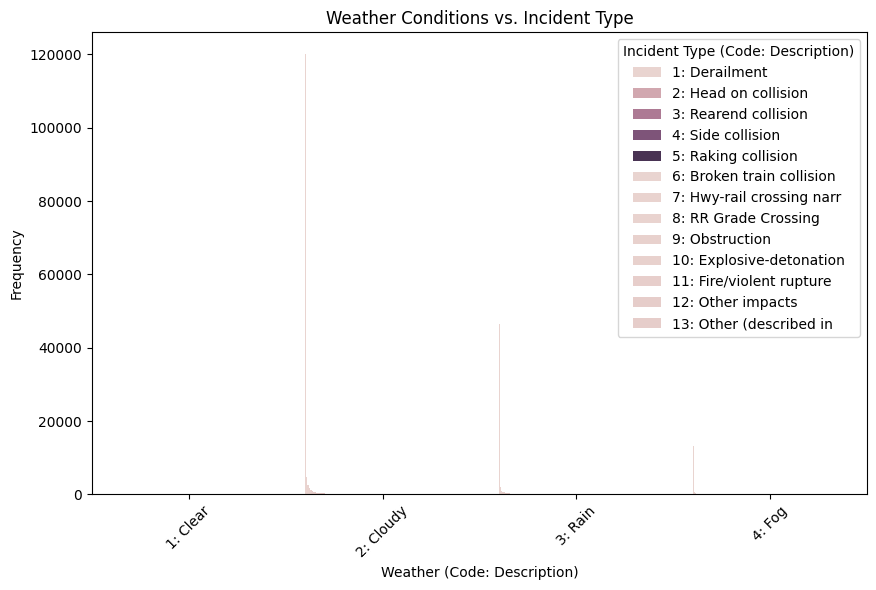

In [77]:
# Define descriptions for weather conditions
weather_descriptions = {
  1: "Clear",
  2: "Cloudy",
  3: "Rain",
  4: "Fog",
  5: "Sleet",
  6: "Snow",
}

# Define descriptions for incident types
incident_type_descriptions = {
  1: "Derailment",
  2: "Head on collision",
  3: "Rearend collision",
  4: "Side collision",
  5: "Raking collision",
  6: "Broken train collision",
  7: "Hwy-rail crossing narr",
  8: "RR Grade Crossing",
  9: "Obstruction",
  10: "Explosive-detonation",
  11: "Fire/violent rupture",
  12: "Other impacts",
  13: "Other (described in",
}

# Assuming you have data in a pandas dataframe called 'cleaned_df' with columns 'WEATHER' and 'CARS'
# Plot showing relationship between weather conditions and incident type
plt.figure(figsize=(10, 6))  # Set the figure size
ax = sns.countplot(x='WEATHER', hue='CARS', data=cleaned_df)  # Create the countplot
plt.title('Weather Conditions vs. Incident Type')  # Set the plot title
plt.xlabel('Weather (Code: Description)')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.legend(title='Incident Type (Code: Description)', loc='upper right')  # Add legend title and location
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add descriptions to the x-axis and legend using list comprehension
ax.set_xticklabels([f"{key}: {val}" for key, val in weather_descriptions.items()], rotation=45)
plt.legend(title='Incident Type (Code: Description)', loc='upper right',
          labels=[f"{key}: {val}" for key, val in incident_type_descriptions.items()])
plt.show()  # Display the plot


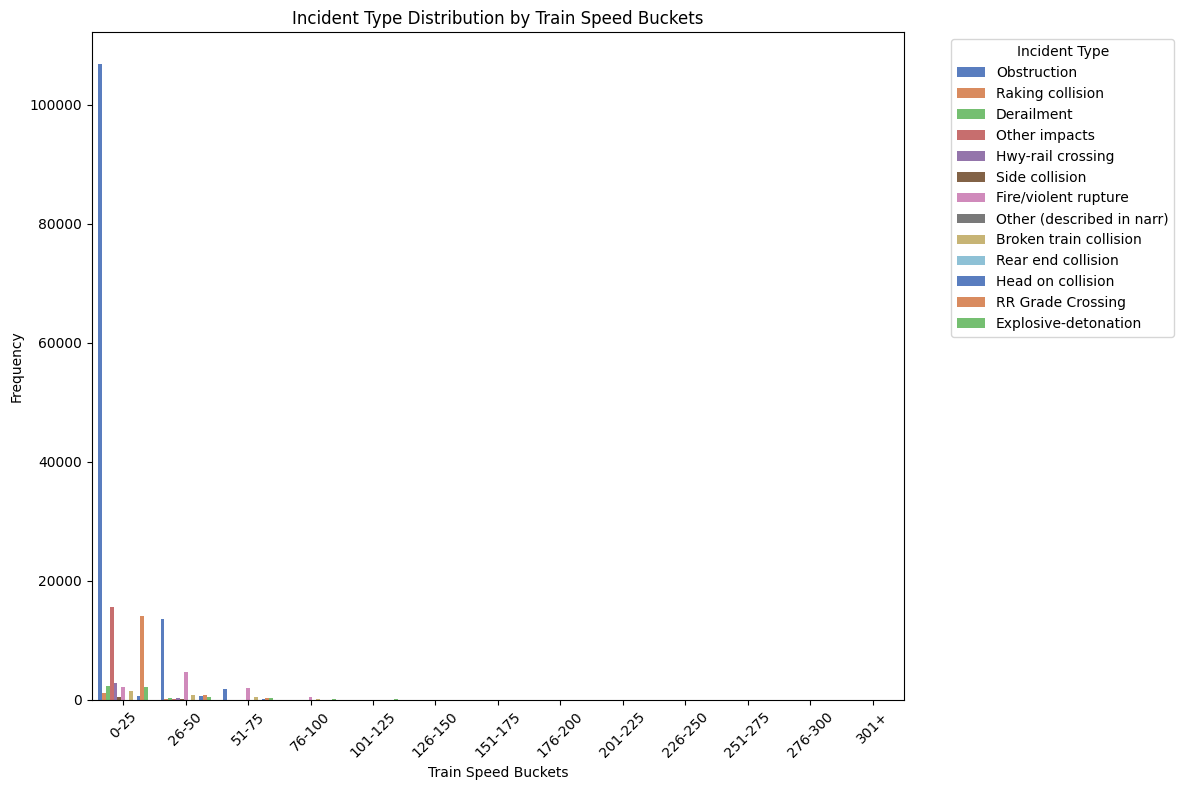

In [78]:
# Define train speed buckets
incident_type_descriptions = {
    1: "Derailment",
    2: "Head on collision",
    3: "Rear end collision",
    4: "Side collision",
    5: "Raking collision",
    6: "Broken train collision",
    7: "Hwy-rail crossing",
    8: "RR Grade Crossing",
    9: "Obstruction",
    10: "Explosive-detonation",
    11: "Fire/violent rupture",
    12: "Other impacts",
    13: "Other (described in narr)",
}


speed_bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, np.inf]
speed_labels = ['0-25', '26-50', '51-75', '76-100', '101-125', '126-150', '151-175', '176-200', '201-225', '226-250', '251-275', '276-300', '301+']

# Create a new column for train speed buckets
cleaned_df['TRNSPD_Bucket'] = pd.cut(cleaned_df['TRNSPD'], bins=speed_bins, labels=speed_labels)

# Distribution of incident types based on train speed buckets
plt.figure(figsize=(12, 8))
sns.countplot(x='TRNSPD_Bucket', hue='TYPE', data=cleaned_df, palette='muted')
plt.title('Incident Type Distribution by Train Speed Buckets')
plt.xlabel('Train Speed Buckets')
plt.ylabel('Frequency')
plt.legend(title='Incident Type', labels=[incident_type_descriptions[t] for t in cleaned_df['TYPE'].unique()], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

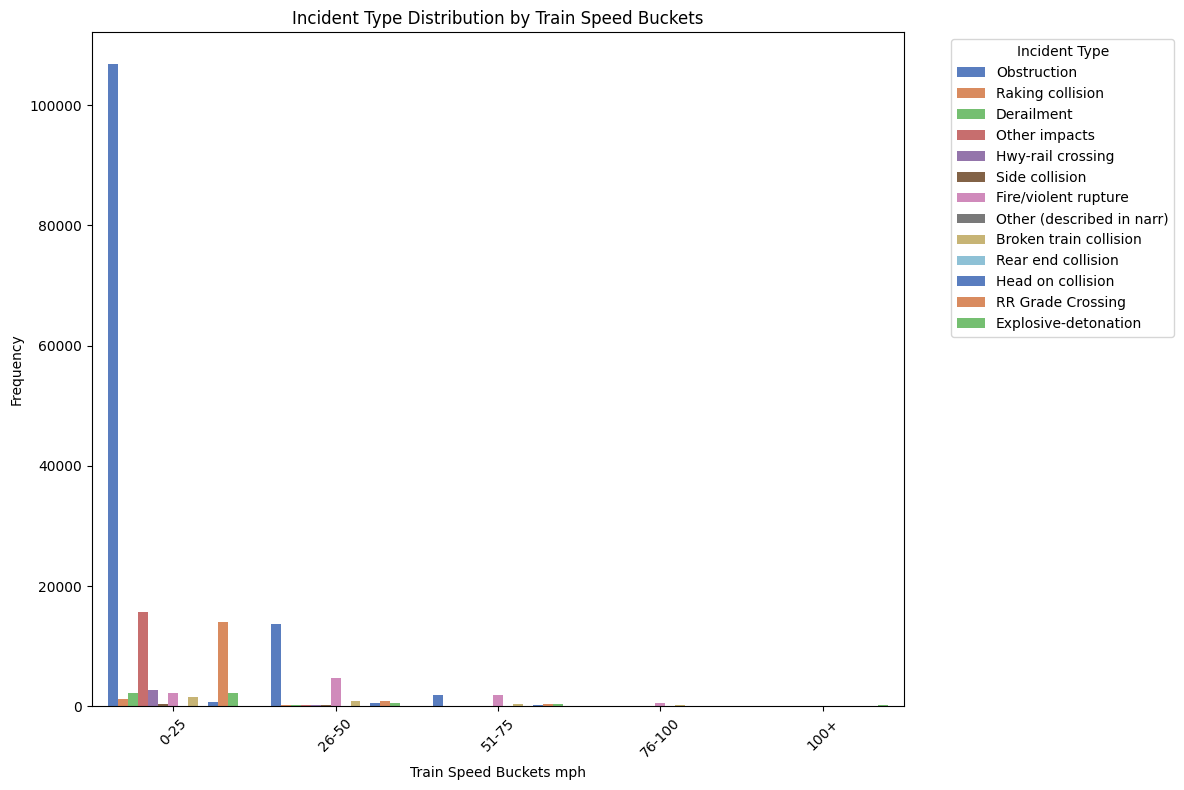

In [79]:
speed_bins = [0, 25, 50, 75, 100, np.inf]
speed_labels = ['0-25', '26-50', '51-75', '76-100', '100+']

# Create a new column for train speed buckets
cleaned_df['TRNSPD_Bucket'] = pd.cut(cleaned_df['TRNSPD'], bins=speed_bins, labels=speed_labels)

# Distribution of incident types based on train speed buckets
plt.figure(figsize=(12, 8))
sns.countplot(x='TRNSPD_Bucket', hue='TYPE', data=cleaned_df, palette='muted')
plt.title('Incident Type Distribution by Train Speed Buckets')
plt.xlabel('Train Speed Buckets mph')
plt.ylabel('Frequency')
plt.legend(title='Incident Type', labels=[incident_type_descriptions[t] for t in cleaned_df['TYPE'].unique()], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

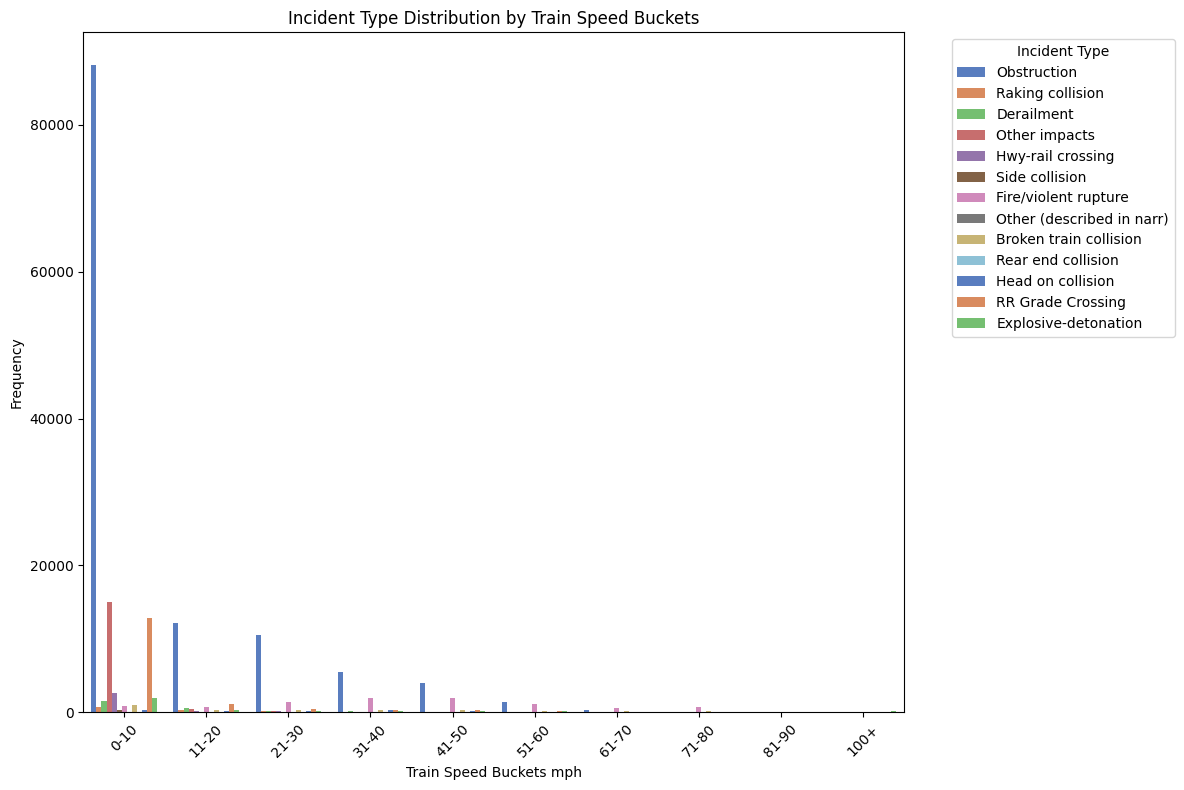

In [80]:
speed_bins = [0, 10, 20, 30, 40,50,60,70,80,90, np.inf]
speed_labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90', '100+']

# Create a new column for train speed buckets
cleaned_df['TRNSPD_Bucket'] = pd.cut(cleaned_df['TRNSPD'], bins=speed_bins, labels=speed_labels)

# Distribution of incident types based on train speed buckets
plt.figure(figsize=(12, 8))
sns.countplot(x='TRNSPD_Bucket', hue='TYPE', data=cleaned_df, palette='muted')
plt.title('Incident Type Distribution by Train Speed Buckets')
plt.xlabel('Train Speed Buckets mph')
plt.ylabel('Frequency')
plt.legend(title='Incident Type', labels=[incident_type_descriptions[t] for t in cleaned_df['TYPE'].unique()], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

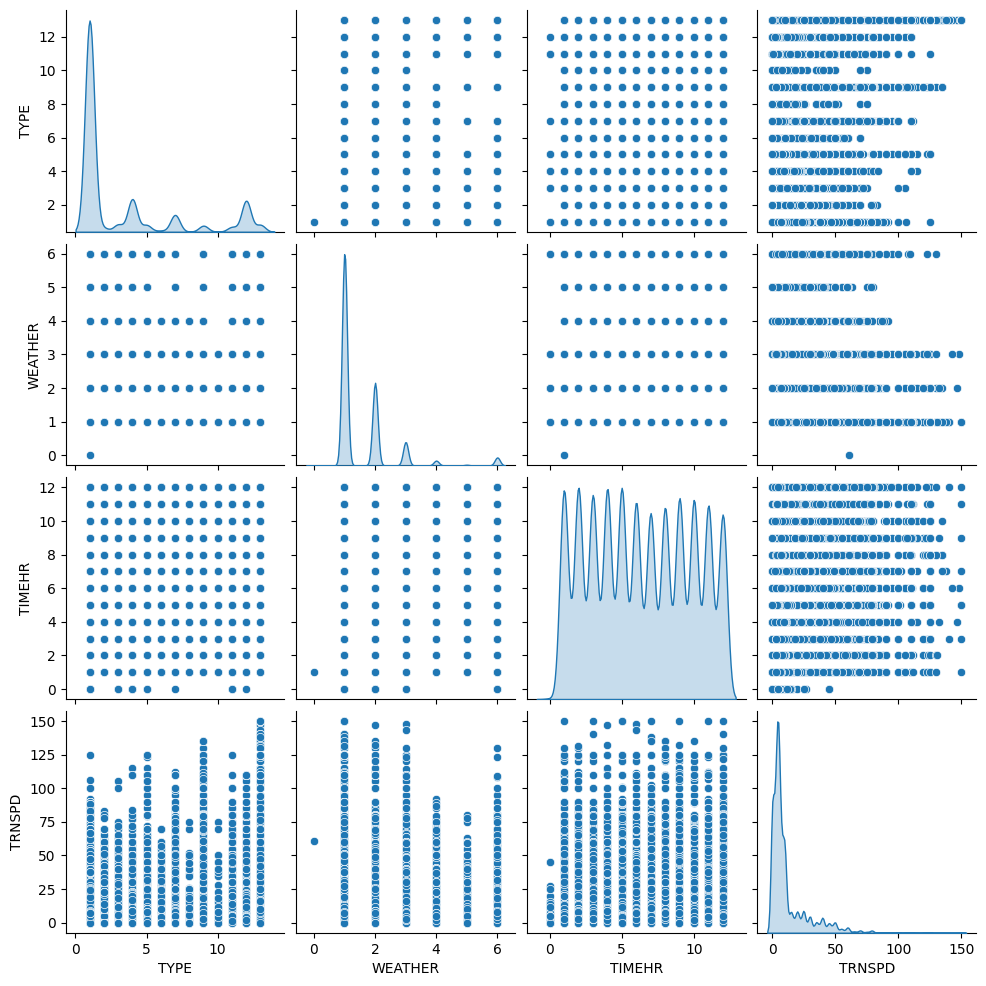

In [81]:
# Grid of pairwise plots visualizes relationships between pairs of variables.  

sns.pairplot(df[['TYPE', 'WEATHER', 'TIMEHR', 'TRNSPD']], diag_kind='kde')
plt.show()

In [82]:
cleaned_df

,IYR,IMO,RAILROAD,INCDTNO,IYR3,IMO3,RR3,INCDTNO3,YEAR,MONTH,...,RREMPINJ,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,COUNTY,CNTYCD,PASSTRN,Speed_Bin,TRNSPD_Bucket
0,21,8,ARR,2021118,21.0,8.0,ARR,2021118,21,8,...,0,0,0,0,0,MATANUSKA SUSITNA,170.0,N,NaN,NaN
1,21,4,ARR,2021075,21.0,4.0,ARR,2021075,21,4,...,0,0,0,0,0,FAIRBANKS NORTH STAR,90.0,N,"(0.999, 11.0]",0-10
2,7,1,IC,543854,7.0,1.0,CAEZ,INDUSTRY,7,1,...,0,0,0,0,0,ST JOHN THE BAPTIST,95.0,N,"(0.999, 11.0]",0-10
4,21,7,ALE,2102DERAIL,21.0,7.0,ALE,2102DERAIL,21,7,...,0,0,0,0,0,MOBILE,97.0,N,"(0.999, 11.0]",0-10
5,23,4,NS,152740,23.0,4.0,NS,152740,23,4,...,0,0,0,0,0,JEFFERSON,73.0,N,"(11.0, 21.0]",11-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218464,5,8,INPR,I081205ID,5.0,8.0,INPR,I081205ID,5,8,...,0,0,0,0,0,CANYON,27.0,N,"(0.999, 11.0]",0-10
218465,5,12,INRD,643082,5.0,12.0,INRD,643082,5,12,...,0,0,0,0,0,GREENE,55.0,N,"(21.0, 31.0]",21-30
218466,5,2,IOCR,ID05081,5.0,2.0,IOCR,ID05081,5,2,...,0,0,0,0,0,CLINTON,27.0,N,"(0.999, 11.0]",0-10
218468,5,3,IOCR,ID05134,5.0,3.0,IOCR,ID05134,5,3,...,0,0,0,0,0,FAYETTE,47.0,N,"(0.999, 11.0]",0-10


In [83]:
cleaned_df.shape

(209275, 97)

In [84]:
numerical_cols1 = 0
categorical_cols1 = 0

for col in cleaned_df.columns:
  # Check if data type is numerical (int or float)
  if pd.api.types.is_numeric_dtype(cleaned_df[col]):
    numerical_cols1 += 1
  else:
    categorical_cols1 += 1

total_cols = cleaned_df.shape[1]

print("There are", numerical_cols1, "numerical features and", categorical_cols1, "categorical features out of", total_cols, "total features.")

There are 59 numerical features and 38 categorical features out of 97 total features.


In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [86]:
# List of categorical columns
categorical_columns = cleaned_df.select_dtypes(include='object').columns.tolist()
# List of numerical columns
numerical_columns = cleaned_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [87]:
# Scale the numerical features, help in uniform scaling
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(cleaned_df[numerical_columns])

In [88]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_numerical_features)

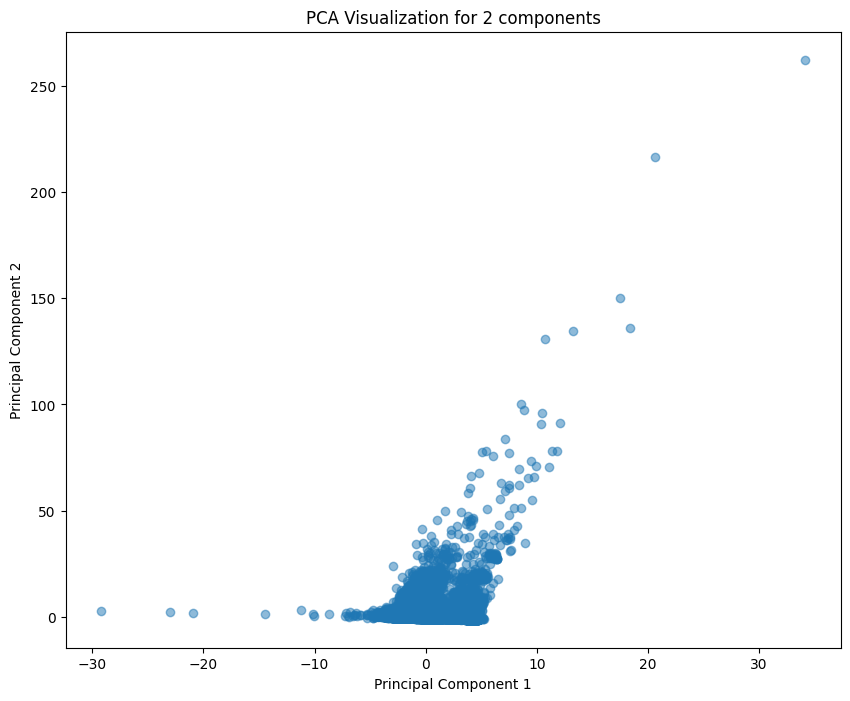

In [89]:
# Visualize the result
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Visualization for 2 components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [90]:
pca.explained_variance_

array([4.55860646, 4.22577155])

In [91]:
# Convert DataFrame to numpy array
X = scaled_numerical_features  

In [92]:
# Define different numbers of components to try
num_components = [2, 5, 10, 20, 30, 40]

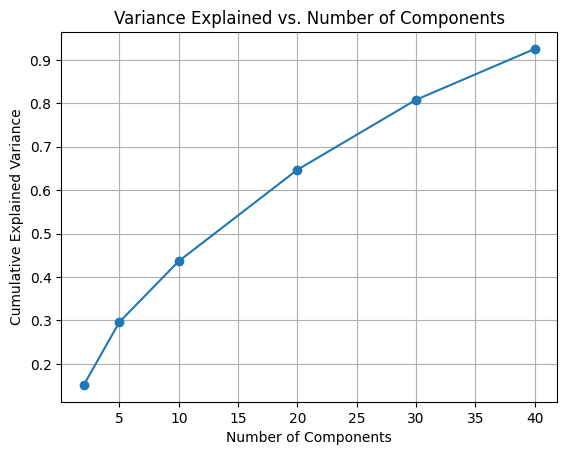

In [93]:
# Compute PCA with different numbers of components
explained_variances = []
for n in num_components:
    pca = PCA(n_components=n)
    pca.fit(X)  # X is your data matrix
    explained_variances.append(sum(pca.explained_variance_ratio_))

# Plot variance explained vs. number of components
plt.plot(num_components, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained vs. Number of Components')
plt.grid(True)
plt.show()

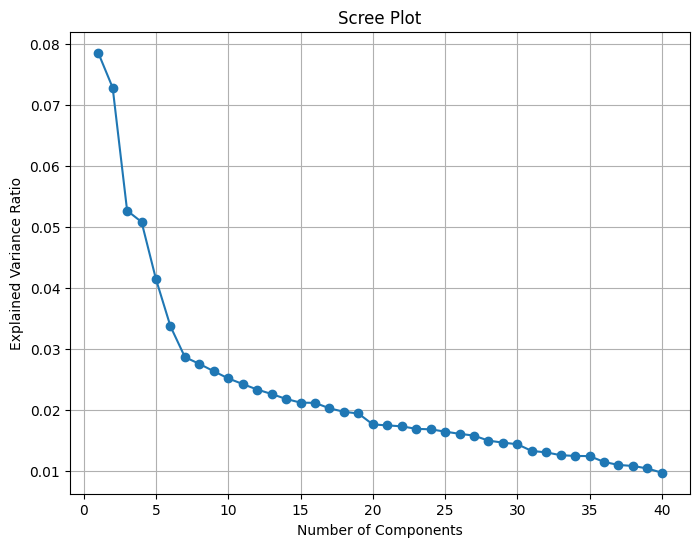

In [94]:
# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Create the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.title('Scree Plot')
plt.show()

Clustering

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [96]:
# Define different numbers of clusters to try
num_clusters = [2,3,4,5,6]

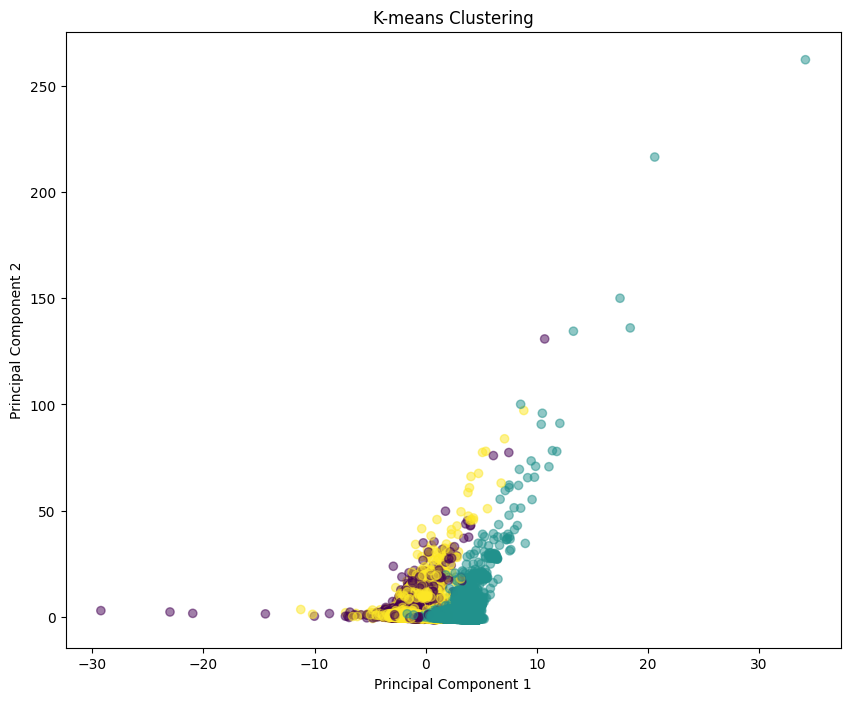

In [97]:
# setting up clusters ti be 3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_numerical_features)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [98]:
data = pd.read_csv("rail.csv", encoding='latin1')

C:\Users\Personal Machine\AppData\Local\Temp\ipykernel_16628\1934949632.py:1: DtypeWarning:

Columns (12,24,35,37,40,41,42,44,80,81,86,99,104,105,117,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,141,142,143,144) have mixed types. Specify dtype option on import or set low_memory=False.



In [99]:
data.head()

,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,...,NARR15,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV
0,21,8,ARR,2021118,NaN,NaN,NaN,NaN,21.0,8.0,...,NaN,0,62.05060,-150.0763,1.0,1.0,NaN,NaN,NaN,SYSTEM
1,21,4,ARR,2021075,NaN,NaN,NaN,NaN,21.0,4.0,...,NaN,0,64.75000,-147.3600,2.0,5.0,NaN,NaN,NaN,SYSTEM
2,7,1,IC,543854,NaN,NaN,NaN,NaN,7.0,1.0,...,NaN,0,0.00000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
3,20,2,ARR,2020027,NaN,NaN,NaN,NaN,20.0,2.0,...,NaN,0,63.39130,-148.9515,2.0,2.0,NaN,NaN,NaN,SYSTEM
4,21,7,ALE,2102DERAIL,21.0,7.0,TASD,D20210727A,21.0,7.0,...,NaN,NaN,30.70786,-88.1940,2.0,5.0,K,NaN,NaN,BEAUREGARD


In [100]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display columns with missing values, if any
print(missing_values[missing_values > 0])

IYR2        199493
IMO2        199493
RR2         199490
INCDTNO2    199490
IYR3            11
             ...  
MOPERA      187142
ADJUNCT1    197785
ADJUNCT2    216094
ADJUNCT3    217820
SUBDIV      187155
Length: 90, dtype: int64


In [101]:
# Drop the 'DUMMY2' column
data.drop(columns=['DUMMY2'], inplace=True)

In [102]:
# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [103]:
data[numerical_cols].isnull().sum()

IYR              0
IMO              0
IYR2        199493
IMO2        199493
IYR3            11
             ...  
DRUG        140925
Latitude    154569
Longitud    154553
SIGNAL      187135
MOPERA      187142
Length: 75, dtype: int64

In [104]:
data[categorical_cols].isnull().sum()

RAILROAD         0
INCDTNO          0
RR2         199490
INCDTNO2    199490
RR3              1
             ...  
RCL         161709
ADJUNCT1    197785
ADJUNCT2    216094
ADJUNCT3    217820
SUBDIV      187155
Length: 69, dtype: int64

In [105]:
# Fill missing values for numerical variables with median
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing values for categorical variables with mode
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


In [106]:
# Separate features and target variable
X = data.drop(columns=['TYPE'])  # Features
y = data['TYPE']  # Target variable

In [107]:
data.shape

(218470, 144)

In [108]:
data_numerical = data[numerical_cols]

In [109]:
data_numerical

,IYR,IMO,IYR2,IMO2,IYR3,IMO3,YEAR,MONTH,DAY,TIMEHR,...,PASSINJ,OTHERKLD,OTHERINJ,CNTYCD,ALCOHOL,DRUG,Latitude,Longitud,SIGNAL,MOPERA
0,21,8,77.0,6.0,21.0,8.0,21,8,16,1.0,...,0,0,0,170.0,0.0,0.0,62.05060,-150.0763,1.0,1.0
1,21,4,77.0,6.0,21.0,4.0,21,4,26,3.0,...,0,0,0,90.0,0.0,0.0,64.75000,-147.3600,2.0,5.0
2,7,1,77.0,6.0,7.0,1.0,7,1,11,7.0,...,0,0,0,95.0,0.0,0.0,0.00000,0.0000,2.0,5.0
3,20,2,77.0,6.0,20.0,2.0,20,2,10,11.0,...,0,0,0,68.0,0.0,0.0,63.39130,-148.9515,2.0,2.0
4,21,7,21.0,7.0,21.0,7.0,21,7,27,4.0,...,0,0,0,97.0,0.0,0.0,30.70786,-88.1940,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218465,5,12,77.0,6.0,5.0,12.0,5,12,16,7.0,...,0,0,0,55.0,0.0,0.0,0.00000,0.0000,2.0,5.0
218466,5,2,77.0,6.0,5.0,2.0,5,2,3,8.0,...,0,0,0,27.0,0.0,0.0,0.00000,0.0000,2.0,5.0
218467,5,3,77.0,6.0,5.0,3.0,5,3,8,9.0,...,0,0,0,45.0,0.0,0.0,0.00000,0.0000,2.0,5.0
218468,5,3,77.0,6.0,5.0,3.0,5,3,1,6.0,...,0,0,0,47.0,0.0,0.0,0.00000,0.0000,2.0,5.0


In [110]:
data_categorical = data[categorical_cols]
data_categorical

,RAILROAD,INCDTNO,RR2,INCDTNO2,RR3,INCDTNO3,DUMMY1,GXID,AMPM,EVACUATE,...,NARR11,NARR12,NARR13,NARR14,NARR15,RCL,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV
0,ARR,2021118,ATK,INDUSTRY,ARR,2021118,F,NOTASGN,PM,0,...,83 AND 84 (EMPTIES IN BETWEEN LOADS).,ENT WAS INITIATED. THE 111 SWITCH WAS STILL L...,.,GATX53835 AND XOMX310310)AND THE 2 MISROUTED O...,DIRECTION OF MOVEMENT (EMPTY GRAIN HOPPERS ON ...,0,K,L,Q,SYSTEM
1,ARR,2021075,ATK,INDUSTRY,ARR,2021075,F,NOTASGN,PM,0,...,83 AND 84 (EMPTIES IN BETWEEN LOADS).,ENT WAS INITIATED. THE 111 SWITCH WAS STILL L...,.,GATX53835 AND XOMX310310)AND THE 2 MISROUTED O...,DIRECTION OF MOVEMENT (EMPTY GRAIN HOPPERS ON ...,0,K,L,Q,SYSTEM
2,IC,543854,ATK,INDUSTRY,CAEZ,INDUSTRY,F,NOTASGN,AM,0,...,83 AND 84 (EMPTIES IN BETWEEN LOADS).,ENT WAS INITIATED. THE 111 SWITCH WAS STILL L...,.,GATX53835 AND XOMX310310)AND THE 2 MISROUTED O...,DIRECTION OF MOVEMENT (EMPTY GRAIN HOPPERS ON ...,0,K,L,Q,SYSTEM
3,ARR,2020027,ATK,INDUSTRY,ARR,2020027,F,NOTASGN,AM,0,...,83 AND 84 (EMPTIES IN BETWEEN LOADS).,ENT WAS INITIATED. THE 111 SWITCH WAS STILL L...,.,GATX53835 AND XOMX310310)AND THE 2 MISROUTED O...,DIRECTION OF MOVEMENT (EMPTY GRAIN HOPPERS ON ...,0,K,L,Q,SYSTEM
4,ALE,2102DERAIL,TASD,D20210727A,ALE,2102DERAIL,F,NOTASGN,PM,0,...,83 AND 84 (EMPTIES IN BETWEEN LOADS).,ENT WAS INITIATED. THE 111 SWITCH WAS STILL L...,.,GATX53835 AND XOMX310310)AND THE 2 MISROUTED O...,DIRECTION OF MOVEMENT (EMPTY GRAIN HOPPERS ON ...,0.0,K,L,Q,BEAUREGARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218465,INRD,643082,ATK,INDUSTRY,INRD,643082,F,NOTASGN,AM,0,...,83 AND 84 (EMPTIES IN BETWEEN LOADS).,ENT WAS INITIATED. THE 111 SWITCH WAS STILL L...,.,GATX53835 AND XOMX310310)AND THE 2 MISROUTED O...,DIRECTION OF MOVEMENT (EMPTY GRAIN HOPPERS ON ...,0.0,K,L,Q,SYSTEM
218466,IOCR,ID05081,ATK,INDUSTRY,IOCR,ID05081,F,NOTASGN,PM,0,...,83 AND 84 (EMPTIES IN BETWEEN LOADS).,ENT WAS INITIATED. THE 111 SWITCH WAS STILL L...,.,GATX53835 AND XOMX310310)AND THE 2 MISROUTED O...,DIRECTION OF MOVEMENT (EMPTY GRAIN HOPPERS ON ...,0.0,K,L,Q,SYSTEM
218467,IOCR,ID05130,ATK,INDUSTRY,IOCR,ID05130,F,NOTASGN,PM,0,...,83 AND 84 (EMPTIES IN BETWEEN LOADS).,ENT WAS INITIATED. THE 111 SWITCH WAS STILL L...,.,GATX53835 AND XOMX310310)AND THE 2 MISROUTED O...,DIRECTION OF MOVEMENT (EMPTY GRAIN HOPPERS ON ...,0.0,K,L,Q,SYSTEM
218468,IOCR,ID05134,ATK,INDUSTRY,IOCR,ID05134,F,NOTASGN,AM,0,...,83 AND 84 (EMPTIES IN BETWEEN LOADS).,ENT WAS INITIATED. THE 111 SWITCH WAS STILL L...,.,GATX53835 AND XOMX310310)AND THE 2 MISROUTED O...,DIRECTION OF MOVEMENT (EMPTY GRAIN HOPPERS ON ...,0.0,K,L,Q,SYSTEM


In [111]:
data_numerical['TYPE']

0          9
1          5
2          1
3         13
4          1
          ..
218465     1
218466     1
218467     1
218468     1
218469     9
Name: TYPE, Length: 218470, dtype: int64

In [112]:
# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Ensure target variable 'TYPE' is included in both numerical and categorical datasets
# numerical_cols = numerical_cols.append(pd.Index(['TYPE']))
categorical_cols = categorical_cols.append(pd.Index(['TYPE']))

# Create numerical and categorical datasets
data_numerical = data[numerical_cols]
data_categorical = data[categorical_cols]


In [113]:
data_numerical.shape

(218470, 75)

In [114]:
data_categorical.shape

(218470, 70)

In [115]:
# Define incident type descriptions
incident_type_descriptions = {
    1: "Derailment",
    2: "Head on collision",
    3: "Rear end collision",
    4: "Side collision",
    5: "Raking collision",
    6: "Broken train collision",
    7: "Hwy-rail crossing",
    8: "RR Grade Crossing",
    9: "Obstruction",
    10: "Explosive-detonation",
    11: "Fire/violent rupture",
    12: "Other impacts",
    13: "Other (described in narr)",
}

# Convert numeric values in TYPE column to incident type descriptions
# Convert numeric values in TYPE column to incident type descriptions
data_categorical.loc[:, 'TYPE'] = data_categorical['TYPE'].map(incident_type_descriptions)


C:\Users\Personal Machine\AppData\Local\Temp\ipykernel_16628\4212781569.py:20: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Obstruction' 'Raking collision' 'Derailment' ... 'Derailment'
 'Derailment' 'Obstruction']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [116]:
data_categorical['TYPE']

0                       Obstruction
1                  Raking collision
2                        Derailment
3         Other (described in narr)
4                        Derailment
                    ...            
218465                   Derailment
218466                   Derailment
218467                   Derailment
218468                   Derailment
218469                  Obstruction
Name: TYPE, Length: 218470, dtype: object

In [117]:
# drop the target variable from data_numerical
data_numerical.drop(columns=['TYPE'], inplace=True)

C:\Users\Personal Machine\AppData\Local\Temp\ipykernel_16628\122458165.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Feature selection for numerical variables

In [118]:

# Initialize SelectFromModel with a Random Forest classifier
sfm = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))

# Fit SelectFromModel to your data (excluding target variable)
# sfm.fit(data_numerical, y=target_variable)
sfm.fit(data_numerical, y)

# Get the selected feature indices
selected_feature_indices = sfm.get_support(indices=True)

# Get the names of the selected features
selected_feature_names_num = data_numerical.columns[selected_feature_indices]


In [119]:
selected_feature_names_num

Index(['IYR', 'IMO', 'IYR3', 'IMO3', 'YEAR', 'MONTH', 'DAY', 'TIMEHR',
       'TIMEMIN', 'STATE', 'TEMP', 'TRNSPD', 'POSITON1', 'HEADEND1',
       'HEADEND2', 'LOADF1', 'EMPTYF1', 'LOADF2', 'EMPTYF2', 'HIGHSPD',
       'ENGHR', 'ENGMIN', 'CDTRHR', 'CDTRMIN', 'JOINTCD', 'REGION', 'YEAR4',
       'CNTYCD'],
      dtype='object')

In [120]:
len(selected_feature_names_num)

28

In [121]:
selected_variables = selected_feature_names_num

In [122]:
filtered_num_df = data_numerical[selected_variables]

In [123]:
filtered_num_df

,IYR,IMO,IYR3,IMO3,YEAR,MONTH,DAY,TIMEHR,TIMEMIN,STATE,...,EMPTYF2,HIGHSPD,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION,YEAR4,CNTYCD
0,21,8,21.0,8.0,21,8,16,1.0,15.0,2,...,0,15,8.0,30.0,4.0,30.0,1,8,2021,170.0
1,21,4,21.0,4.0,21,4,26,3.0,0.0,2,...,0,5,4.0,30.0,4.0,30.0,1,8,2021,90.0
2,7,1,7.0,1.0,7,1,11,7.0,10.0,22,...,0,4,10.0,28.0,10.0,28.0,1,5,2007,95.0
3,20,2,20.0,2.0,20,2,10,11.0,41.0,2,...,0,2,10.0,30.0,10.0,30.0,1,8,2020,68.0
4,21,7,21.0,7.0,21,7,27,4.0,40.0,1,...,0,5,4.0,30.0,4.0,30.0,1,3,2021,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218465,5,12,5.0,12.0,5,12,16,7.0,15.0,18,...,5,25,10.0,15.0,4.0,30.0,1,4,2005,55.0
218466,5,2,5.0,2.0,5,2,3,8.0,5.0,39,...,0,7,9.0,5.0,9.0,5.0,1,2,2005,27.0
218467,5,3,5.0,3.0,5,3,8,9.0,55.0,39,...,0,24,7.0,55.0,7.0,55.0,1,2,2005,45.0
218468,5,3,5.0,3.0,5,3,1,6.0,0.0,39,...,0,7,10.0,30.0,10.0,30.0,1,2,2005,47.0


# Feature selection for Categorical Variables

In [124]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [125]:

# Load the dataset into a DataFrame named df
df = pd.read_csv("rail.csv", encoding='latin1')    # encoding is used when we have issues reading the data using pandas

# print first 5 rows of the dataframe
df.head() 

C:\Users\Personal Machine\AppData\Local\Temp\ipykernel_16628\2268639683.py:2: DtypeWarning:

Columns (12,24,35,37,40,41,42,44,80,81,86,99,104,105,117,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,141,142,143,144) have mixed types. Specify dtype option on import or set low_memory=False.



,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,...,NARR15,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV
0,21,8,ARR,2021118,NaN,NaN,NaN,NaN,21.0,8.0,...,NaN,0,62.05060,-150.0763,1.0,1.0,NaN,NaN,NaN,SYSTEM
1,21,4,ARR,2021075,NaN,NaN,NaN,NaN,21.0,4.0,...,NaN,0,64.75000,-147.3600,2.0,5.0,NaN,NaN,NaN,SYSTEM
2,7,1,IC,543854,NaN,NaN,NaN,NaN,7.0,1.0,...,NaN,0,0.00000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
3,20,2,ARR,2020027,NaN,NaN,NaN,NaN,20.0,2.0,...,NaN,0,63.39130,-148.9515,2.0,2.0,NaN,NaN,NaN,SYSTEM
4,21,7,ALE,2102DERAIL,21.0,7.0,TASD,D20210727A,21.0,7.0,...,NaN,NaN,30.70786,-88.1940,2.0,5.0,K,NaN,NaN,BEAUREGARD


In [126]:
print(df.dtypes)

IYR           int64
IMO           int64
RAILROAD     object
INCDTNO      object
IYR2        float64
             ...   
MOPERA      float64
ADJUNCT1     object
ADJUNCT2     object
ADJUNCT3     object
SUBDIV       object
Length: 145, dtype: object


In [127]:
df.shape

(218470, 145)

In [128]:
df_type = df[['TYPE']].copy()

In [129]:
df_type

,TYPE
0,9
1,5
2,1
3,13
4,1
...,...
218465,1
218466,1
218467,1
218468,1


In [130]:
target_column = 'TYPE'
target_variable = df[target_column]

In [131]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [132]:
categorical_df = df[categorical_cols].copy()  # Copy to avoid modifying original DataFrame
categorical_df[target_column] = target_variable  # Add the target column as a new column

In [133]:
categorical_df .head()

,RAILROAD,INCDTNO,RR2,INCDTNO2,RR3,INCDTNO3,DUMMY1,GXID,AMPM,EVACUATE,...,NARR12,NARR13,NARR14,NARR15,RCL,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV,TYPE
0,ARR,2021118,NaN,NaN,ARR,2021118,NaN,NaN,PM,0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,SYSTEM,9
1,ARR,2021075,NaN,NaN,ARR,2021075,NaN,NaN,PM,0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,SYSTEM,5
2,IC,543854,NaN,NaN,CAEZ,INDUSTRY,NaN,NaN,AM,0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1
3,ARR,2020027,NaN,NaN,ARR,2020027,NaN,NaN,AM,0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,SYSTEM,13
4,ALE,2102DERAIL,TASD,D20210727A,ALE,2102DERAIL,NaN,NaN,PM,0,...,NaN,NaN,NaN,NaN,NaN,K,NaN,NaN,BEAUREGARD,1


In [134]:
incident_type_descriptions = {
    1: "Derailment",
    2: "Head on collision",
    3: "Rear end collision",
    4: "Side collision",
    5: "Raking collision",
    6: "Broken train collision",
    7: "Hwy-rail crossing",
    8: "RR Grade Crossing",
    9: "Obstruction",
    10: "Explosive-detonation",
    11: "Fire/violent rupture",
    12: "Other impacts",
    13: "Other (described in narr)",
}

# Replace numerical values in 'TYPE' column with descriptions from the dictionary
categorical_df ['TYPE'] = categorical_df ['TYPE'].replace(to_replace=incident_type_descriptions.keys(), value=incident_type_descriptions.values())

# Print the modified DataFrame
print(categorical_df)

       RAILROAD     INCDTNO   RR2    INCDTNO2   RR3    INCDTNO3 DUMMY1 GXID  \
0           ARR     2021118   NaN         NaN   ARR     2021118    NaN  NaN   
1           ARR     2021075   NaN         NaN   ARR     2021075    NaN  NaN   
2            IC      543854   NaN         NaN  CAEZ    INDUSTRY    NaN  NaN   
3           ARR     2020027   NaN         NaN   ARR     2020027    NaN  NaN   
4           ALE  2102DERAIL  TASD  D20210727A   ALE  2102DERAIL    NaN  NaN   
...         ...         ...   ...         ...   ...         ...    ...  ...   
218465     INRD      643082   NaN         NaN  INRD      643082    NaN  NaN   
218466     IOCR     ID05081   NaN         NaN  IOCR     ID05081    NaN  NaN   
218467     IOCR     ID05130   NaN         NaN  IOCR     ID05130    NaN  NaN   
218468     IOCR     ID05134   NaN         NaN  IOCR     ID05134    NaN  NaN   
218469     IOCR     IO05023   NaN         NaN  IOCR     IO05023    NaN  NaN   

       AMPM EVACUATE  ... NARR12 NARR13 NARR14 NARR

In [135]:
# Check for null values in categorical_df
null_values = categorical_df.isnull().sum()

# Print a summary of null values
print("Summary of Null Values in categorical_df:")
print(null_values)

Summary of Null Values in categorical_df:
RAILROAD         0
INCDTNO          0
RR2         199490
INCDTNO2    199490
RR3              1
             ...  
ADJUNCT1    197785
ADJUNCT2    216094
ADJUNCT3    217820
SUBDIV      187155
TYPE             0
Length: 70, dtype: int64


In [136]:
# Calculate missing value percentages
missing_percentages = (categorical_df.isnull().sum() / len(categorical_df)) * 100

# Filter features with more than 40% missing values
features_to_drop = missing_percentages[missing_percentages > 40].index.tolist()

# Print the features to drop
print("Features to Drop (More Than 40% Missing Values):")
print(features_to_drop)

Features to Drop (More Than 40% Missing Values):
['RR2', 'INCDTNO2', 'DUMMY1', 'GXID', 'TRKDNSTY', 'RRCAR2', 'LOADED2', 'CAUSE2', 'DUMMY4', 'DUMMY6', 'DUMMY7', 'SSB1', 'SSB2', 'NARR2', 'NARR3', 'NARR4', 'NARR5', 'NARR6', 'NARR7', 'NARR8', 'NARR9', 'NARR10', 'NARR11', 'NARR12', 'NARR13', 'NARR14', 'NARR15', 'RCL', 'ADJUNCT1', 'ADJUNCT2', 'ADJUNCT3', 'SUBDIV']


In [137]:
# Create a copy to avoid modifying the original DataFrame
categorical_df_clean = categorical_df.drop(features_to_drop, axis=1)

# Print the modified DataFrame
print("\nModified categorical_df (Features Dropped):")
print(categorical_df_clean.head())  # Print the first few rows


Modified categorical_df (Features Dropped):
  RAILROAD     INCDTNO   RR3    INCDTNO3 AMPM EVACUATE DIVISION    STATION  \
0      ARR     2021118   ARR     2021118   PM        0      NaN     WILLOW   
1      ARR     2021075   ARR     2021075   PM        0      NaN  FAIRBANKS   
2       IC      543854  CAEZ    INDUSTRY   AM        0  CENTRAL    RESERVE   
3      ARR     2020027   ARR     2020027   AM        0      NaN   CANTWELL   
4      ALE  2102DERAIL   ALE  2102DERAIL   PM        0      NaN     MOBILE   

  MILEPOST TYPSPD  ...  STCNTY TOTINJ TYPRR   RRDIV METHOD NARRLEN  \
0    195.1      E  ...  02C170      0    Cl     NaN    NaN     305   
1    G16.4      E  ...  02C090      0    Cl     NaN    NaN     319   
2    420.5      E  ...  22C095      0    1L  CENTRA      N     147   
3    313.9      E  ...  02C068      0    Cl     NaN    NaN     329   
4      NaN      E  ...  01C097      0   NaN     NaN    NaN     194   

                 COUNTY PASSTRN  \
0     MATANUSKA SUSITNA       

In [138]:
# Check for null values in categorical_df
null_values = categorical_df_clean.isnull().sum()

# Print a summary of null values
print("Summary of Null Values in categorical_df_clean:")
print(null_values)

Summary of Null Values in categorical_df_clean:
RAILROAD        0
INCDTNO         0
RR3             1
INCDTNO3       11
AMPM           80
EVACUATE        0
DIVISION    35489
STATION       250
MILEPOST    29536
TYPSPD      16867
TRNNBR      35360
TRNDIR      21542
TONS            0
TYPEQ       11374
EQATT       26653
TRKNAME      2659
TRKCLAS     12042
TYPTRK       2296
RRCAR1      12394
CARNBR1     11395
LOADED1     36615
EQPDMG          0
TRKDMG          0
CAUSE           2
ACCAUSE         3
ACCTRK        514
ACCTRKCL      403
ACCDMG          0
STCNTY          5
TOTINJ          0
TYPRR          54
RRDIV       38427
METHOD      33721
NARRLEN         0
COUNTY       3619
PASSTRN     10845
NARR1       78454
TYPE            0
dtype: int64


In [139]:
# Impute missing values using mode imputation
categorical_df_filled = categorical_df_clean.fillna(categorical_df_clean.mode().iloc[0])

# Print the modified DataFrame
print("categorical_df with Missing Values Imputed (Mode):")
print(categorical_df_filled)  # Print the first few rows

categorical_df with Missing Values Imputed (Mode):
       RAILROAD     INCDTNO   RR3    INCDTNO3 AMPM EVACUATE      DIVISION  \
0           ARR     2021118   ARR     2021118   PM        0        SYSTEM   
1           ARR     2021075   ARR     2021075   PM        0        SYSTEM   
2            IC      543854  CAEZ    INDUSTRY   AM        0       CENTRAL   
3           ARR     2020027   ARR     2020027   AM        0        SYSTEM   
4           ALE  2102DERAIL   ALE  2102DERAIL   PM        0        SYSTEM   
...         ...         ...   ...         ...  ...      ...           ...   
218465     INRD      643082  INRD      643082   AM        0  INDIANAPOLIS   
218466     IOCR     ID05081  IOCR     ID05081   PM        0        SYSTEM   
218467     IOCR     ID05130  IOCR     ID05130   PM        0        SYSTEM   
218468     IOCR     ID05134  IOCR     ID05134   AM        0        SYSTEM   
218469     IOCR     IO05023  IOCR     IO05023   AM        0        SYSTEM   

                     STA

In [140]:
# Check for null values in categorical_df
null_values = categorical_df_filled.isnull().sum()

# Print a summary of null values
print("Summary of Null Values in categorical_df_filled:")
print(null_values)

Summary of Null Values in categorical_df_filled:
RAILROAD    0
INCDTNO     0
RR3         0
INCDTNO3    0
AMPM        0
EVACUATE    0
DIVISION    0
STATION     0
MILEPOST    0
TYPSPD      0
TRNNBR      0
TRNDIR      0
TONS        0
TYPEQ       0
EQATT       0
TRKNAME     0
TRKCLAS     0
TYPTRK      0
RRCAR1      0
CARNBR1     0
LOADED1     0
EQPDMG      0
TRKDMG      0
CAUSE       0
ACCAUSE     0
ACCTRK      0
ACCTRKCL    0
ACCDMG      0
STCNTY      0
TOTINJ      0
TYPRR       0
RRDIV       0
METHOD      0
NARRLEN     0
COUNTY      0
PASSTRN     0
NARR1       0
TYPE        0
dtype: int64


In [141]:
# Check if there are any NaN values in the DataFrame
if categorical_df_filled.isna().any().any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")


There are no NaN values in the DataFrame.


In [142]:
# Check data types of each column
print(categorical_df_filled.dtypes)

RAILROAD    object
INCDTNO     object
RR3         object
INCDTNO3    object
AMPM        object
EVACUATE    object
DIVISION    object
STATION     object
MILEPOST    object
TYPSPD      object
TRNNBR      object
TRNDIR      object
TONS        object
TYPEQ       object
EQATT       object
TRKNAME     object
TRKCLAS     object
TYPTRK      object
RRCAR1      object
CARNBR1     object
LOADED1     object
EQPDMG      object
TRKDMG      object
CAUSE       object
ACCAUSE     object
ACCTRK      object
ACCTRKCL    object
ACCDMG      object
STCNTY      object
TOTINJ      object
TYPRR       object
RRDIV       object
METHOD      object
NARRLEN     object
COUNTY      object
PASSTRN     object
NARR1       object
TYPE        object
dtype: object


In [143]:
# Check for non-string data in each column
for col in categorical_df_filled.columns:
    non_string_values = categorical_df_filled[col].apply(lambda x: type(x) != str)
    if non_string_values.any():
        print(f"Non-string values found in column '{col}':")
        print(categorical_df_filled[col][non_string_values])
    else:
        print(f"No non-string values found in column '{col}'.")

No non-string values found in column 'RAILROAD'.
No non-string values found in column 'INCDTNO'.
No non-string values found in column 'RR3'.
No non-string values found in column 'INCDTNO3'.
No non-string values found in column 'AMPM'.
Non-string values found in column 'EVACUATE':
0         0
1         0
2         0
3         0
4         0
         ..
218465    0
218466    0
218467    0
218468    0
218469    0
Name: EVACUATE, Length: 54630, dtype: object
No non-string values found in column 'DIVISION'.
No non-string values found in column 'STATION'.
No non-string values found in column 'MILEPOST'.
No non-string values found in column 'TYPSPD'.
No non-string values found in column 'TRNNBR'.
Non-string values found in column 'TRNDIR':
0         1.0
1         1.0
2         2.0
3         2.0
4         2.0
         ... 
218465    2.0
218466    1.0
218467    2.0
218468    1.0
218469    3.0
Name: TRNDIR, Length: 210753, dtype: object
No non-string values found in column 'TONS'.
Non-string valu

In [144]:
categorical_df_encoded = categorical_df_filled.copy()

# Perform count encoding for each column
for col in categorical_df_encoded.columns:
    count_map = categorical_df_encoded[col].value_counts().to_dict()
    categorical_df_encoded[col + '_count'] = categorical_df_encoded[col].map(count_map)

# Drop the original categorical columns
categorical_df_encoded.drop(columns=categorical_df_filled.columns, inplace=True)

# Print the encoded DataFrame
print(categorical_df_encoded.head())

   RAILROAD_count  INCDTNO_count  RR3_count  INCDTNO3_count  AMPM_count  \
0             265              2        265               2      113785   
1             265              1        265               1      113785   
2            2112              1         16            4331      104685   
3             265              1        265               1      104685   
4               7              1          7               1      113785   

   EVACUATE_count  DIVISION_count  STATION_count  MILEPOST_count  \
0           54374           51136              7              10   
1           54374           51136             40               1   
2           54374            3064             64               6   
3           54374           51136              4               7   
4           54374           51136            465           37430   

   TYPSPD_count  ...  STCNTY_count  TOTINJ_count  TYPRR_count  RRDIV_count  \
0        177838  ...            37        205022         4043 

In [145]:
# Create a new list with original names
original_names = [name[:-6] for name in categorical_df_encoded.columns]  # Adjust -5 based on suffix length

# Assign the new column names to the DataFrame
categorical_df_encoded.columns = original_names

print(categorical_df_encoded.columns)  # Print column names to verify

Index(['RAILROAD', 'INCDTNO', 'RR3', 'INCDTNO3', 'AMPM', 'EVACUATE',
       'DIVISION', 'STATION', 'MILEPOST', 'TYPSPD', 'TRNNBR', 'TRNDIR', 'TONS',
       'TYPEQ', 'EQATT', 'TRKNAME', 'TRKCLAS', 'TYPTRK', 'RRCAR1', 'CARNBR1',
       'LOADED1', 'EQPDMG', 'TRKDMG', 'CAUSE', 'ACCAUSE', 'ACCTRK', 'ACCTRKCL',
       'ACCDMG', 'STCNTY', 'TOTINJ', 'TYPRR', 'RRDIV', 'METHOD', 'NARRLEN',
       'COUNTY', 'PASSTRN', 'NARR1', 'TYPE'],
      dtype='object')


In [146]:
# Retrieve feature names after encoding
feature_names = categorical_df_encoded.columns.tolist()
feature_names.remove('TYPE')  # Assuming 'target_variable' is your target column

# Split data into features (X) and target variable (y)
X = categorical_df_encoded[feature_names]
y = categorical_df_encoded['TYPE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit Random Forest model
model.fit(X_train, y_train)

# Select features based on feature importance
sfm = SelectFromModel(model, threshold='median')  # Select features above median importance
sfm.fit(X_train, y_train)

# Transform training and testing data
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Get selected feature indices
selected_feature_indices = sfm.get_support(indices=True)

# Print selected feature names
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
print("Selected Features:", selected_feature_names)


Selected Features: ['RAILROAD', 'INCDTNO', 'RR3', 'INCDTNO3', 'STATION', 'MILEPOST', 'TRNNBR', 'TYPEQ', 'TRKNAME', 'RRCAR1', 'CARNBR1', 'EQPDMG', 'TRKDMG', 'CAUSE', 'ACCAUSE', 'ACCDMG', 'STCNTY', 'NARRLEN', 'COUNTY']


In [147]:
len(selected_feature_names)

19

In [148]:
selected_features = selected_feature_names

In [149]:
# Create a new DataFrame by selecting only columns with names in 'selected_features'
filtered_cat_df = categorical_df_filled[selected_features]

In [150]:
filtered_cat_df

,RAILROAD,INCDTNO,RR3,INCDTNO3,STATION,MILEPOST,TRNNBR,TYPEQ,TRKNAME,RRCAR1,CARNBR1,EQPDMG,TRKDMG,CAUSE,ACCAUSE,ACCDMG,STCNTY,NARRLEN,COUNTY
0,ARR,2021118,ARR,2021118,WILLOW,195.1,1,A,MAIN,RL,5,"9,949",0,H102,H102,"15,675",02C170,305,MATANUSKA SUSITNA
1,ARR,2021075,ARR,2021075,FAIRBANKS,G16.4,459,7,EIELSON BRANCH G16.4,GATX,206895,"60,000",0,H307,H307,"60,000",02C090,319,FAIRBANKS NORTH STAR
2,IC,543854,CAEZ,INDUSTRY,RESERVE,420.5,RNO1,1,#4 SWITCH AT CARGILL,CGEX,2000,"5,220","4,766",T311,T311,"9,986",22C095,147,ST JOHN THE BAPTIST
3,ARR,2020027,ARR,2020027,CANTWELL,313.9,1,A,MAIN,SPR,9,"14,835",0,M101,M101,"14,835",02C068,329,DENALI
4,ALE,2102DERAIL,ALE,2102DERAIL,MOBILE,0,1400,1,ODELL YARD,UP,999999.0,0,"51,294",T110,T110,"51,294",01C097,194,MOBILE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218465,INRD,643082,INRD,643082,SOLSBERRY,71.7,SABL,1,MAIN,INRD,3636.0,"300,000","70,000",T207,T207,"370,000",18C055,300,GREENE
218466,IOCR,ID05081,IOCR,ID05081,MIDLAND CITY,44.9,WCH-,1,#2 YARD TRACK SWITCH,MLLX,97743.0,"20,000","15,000",T110,T110,"35,000",39C027,139,CLINTON
218467,IOCR,ID05130,IOCR,ID05130,SUGAR GROVE,36.95,L-3,1,MAIN LINE MP 36.95,JTTX,49056.0,"20,000","20,000",T220,T220,"40,000",39C045,332,FAIRFIELD
218468,IOCR,ID05134,IOCR,ID05134,WASHINGTON COURT HOU,228.5,WCH-,1,N. END HANDY TRACK,CSXT,137671.0,"9,000","6,000",T110,T110,"15,000",39C047,284,FAYETTE


In [151]:
# Concatenate the DataFrames along axis 1 (columns)
combined_df = pd.concat([filtered_cat_df, filtered_num_df, df_type], axis=1)

In [152]:
combined_df

,RAILROAD,INCDTNO,RR3,INCDTNO3,STATION,MILEPOST,TRNNBR,TYPEQ,TRKNAME,RRCAR1,...,HIGHSPD,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION,YEAR4,CNTYCD,TYPE
0,ARR,2021118,ARR,2021118,WILLOW,195.1,1,A,MAIN,RL,...,15,8.0,30.0,4.0,30.0,1,8,2021,170.0,9
1,ARR,2021075,ARR,2021075,FAIRBANKS,G16.4,459,7,EIELSON BRANCH G16.4,GATX,...,5,4.0,30.0,4.0,30.0,1,8,2021,90.0,5
2,IC,543854,CAEZ,INDUSTRY,RESERVE,420.5,RNO1,1,#4 SWITCH AT CARGILL,CGEX,...,4,10.0,28.0,10.0,28.0,1,5,2007,95.0,1
3,ARR,2020027,ARR,2020027,CANTWELL,313.9,1,A,MAIN,SPR,...,2,10.0,30.0,10.0,30.0,1,8,2020,68.0,13
4,ALE,2102DERAIL,ALE,2102DERAIL,MOBILE,0,1400,1,ODELL YARD,UP,...,5,4.0,30.0,4.0,30.0,1,3,2021,97.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218465,INRD,643082,INRD,643082,SOLSBERRY,71.7,SABL,1,MAIN,INRD,...,25,10.0,15.0,4.0,30.0,1,4,2005,55.0,1
218466,IOCR,ID05081,IOCR,ID05081,MIDLAND CITY,44.9,WCH-,1,#2 YARD TRACK SWITCH,MLLX,...,7,9.0,5.0,9.0,5.0,1,2,2005,27.0,1
218467,IOCR,ID05130,IOCR,ID05130,SUGAR GROVE,36.95,L-3,1,MAIN LINE MP 36.95,JTTX,...,24,7.0,55.0,7.0,55.0,1,2,2005,45.0,1
218468,IOCR,ID05134,IOCR,ID05134,WASHINGTON COURT HOU,228.5,WCH-,1,N. END HANDY TRACK,CSXT,...,7,10.0,30.0,10.0,30.0,1,2,2005,47.0,1


In [153]:
combined_df.to_csv('combined_df.csv', index=False)

# PREDICTION MODEL WITHOUT FEATURE SELECTION

In [154]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings




df = pd.read_csv("rail.csv", encoding='latin1', low_memory=False)

df.drop(columns=['DUMMY2'], inplace=True) # Deleting column, as all data values are NAN


# Step 2: Impute missing values
# Impute numerical variables with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute categorical variables with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])




# Define your target variable
y = df['TYPE']

# Define your features (excluding the target variable)
X = df.drop(columns=['TYPE'])



if len(X) == 0:
    print("No samples remaining after handling missing values.")
else:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)



# Define and train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_preprocessed, y_train)

# Evaluate the model
train_score = logreg.score(X_train_preprocessed, y_train)
test_score = logreg.score(X_test_preprocessed, y_test)

warnings.filterwarnings("ignore", category=UserWarning)
print("Training accuracy:", train_score)
print("Testing accuracy:", test_score)

C:\Users\Personal Machine\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training accuracy: 0.8597175813612853
Testing accuracy: 0.8245983430219253


In [155]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test_preprocessed)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[26736    28    51   532    53    10    15     0    54     0    28   626
     73]
 [   70   117    80   120     6     0     1     0    22     0     4    35
      3]
 [  169    83   334   251    14     0     1     1    36     0     4    72
     17]
 [  758    25    80  2945    51     1     0     0    18     0    19   521
     22]
 [  237     3    20   271   147     1     0     0    21     0     5   160
     17]
 [   64     3     8    16     3     8     0     0     1     0     2    18
      1]
 [    7     0     0     0     0     0  2122     0     1     0     1     0
      0]
 [    5     1     4     7     1     0     0     0     0     0     0     0
      0]
 [  166    15    19    19     9     0     3     0   481     0    10    75
     51]
 [   11     1     0     0     1     0     0     0     0     0     3     1
      0]
 [   54     0     2     2     2     0     0     0     7     0   495    21
     17]
 [ 1088    37    44   472    49     3     4     0    70     0    38  

In [156]:
from sklearn.metrics import classification_report
import warnings
from sklearn.metrics import classification_report

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning) # There are some warning on Imblanaced data
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.95      0.92     28206
           2       0.37      0.26      0.30       458
           3       0.52      0.34      0.41       982
           4       0.63      0.66      0.65      4440
           5       0.43      0.17      0.24       882
           6       0.35      0.06      0.11       124
           7       0.99      1.00      0.99      2131
           8       0.00      0.00      0.00        18
           9       0.65      0.57      0.60       848
          10       0.00      0.00      0.00        17
          11       0.79      0.82      0.81       600
          12       0.57      0.54      0.56      4084
          13       0.62      0.49      0.54       904

    accuracy                           0.82     43694
   macro avg       0.52      0.45      0.47     43694
weighted avg       0.81      0.82      0.81     43694



## PREDICTION MODEL AFTER FEATURE SELECTION

In [157]:
df = pd.read_csv("combined_df.csv", encoding='latin1', low_memory=False)

# df.drop(columns=['DUMMY2'], inplace=True) # Deleting column, as all data values are NAN


# Step 2: Impute missing values
# Impute numerical variables with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute categorical variables with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])




# Define your target variable
y = df['TYPE']

# Define your features (excluding the target variable)
X = df.drop(columns=['TYPE'])



if len(X) == 0:
    print("No samples remaining after handling missing values.")
else:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)



# Define and train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_preprocessed, y_train)

# Evaluate the model
train_score = logreg.score(X_train_preprocessed, y_train)
test_score = logreg.score(X_test_preprocessed, y_test)


print("Training accuracy:", train_score)
print("Testing accuracy:", test_score)

Training accuracy: 0.9450897148349888
Testing accuracy: 0.8317389115210326


In [158]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test_preprocessed)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[26653    25    57   543    68    17     3     0    65     0    27   662
     86]
 [   82   155    53   109     5     2     0     0    11     0     1    37
      3]
 [  163    40   460   192    13     6     0     0    26     0     5    69
      8]
 [  719    28    87  3062    63     5     0     0    22     0    15   428
     11]
 [  223     8    23   226   222     1     0     0    18     0     4   142
     15]
 [   62     1     7    16     3    17     0     0     0     0     2    14
      2]
 [    8     0     1     0     0     0  2111     0     5     0     1     4
      1]
 [    4     3     0     7     0     0     0     2     1     0     0     1
      0]
 [  146    11    18    19     9     2     0     0   496     0     7    87
     53]
 [   10     0     0     0     0     0     0     0     1     0     4     2
      0]
 [   48     1     1     0     1     0     0     0     7     0   507    22
     13]
 [ 1053    23    59   442    54     9     1     0    73     0    31  

In [159]:
from sklearn.metrics import classification_report
import warnings
from sklearn.metrics import classification_report

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning) # There are some warning on Imblanaced data
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.94      0.92     28206
           2       0.52      0.34      0.41       458
           3       0.60      0.47      0.52       982
           4       0.66      0.69      0.67      4440
           5       0.50      0.25      0.33       882
           6       0.28      0.14      0.18       124
           7       1.00      0.99      0.99      2131
           8       1.00      0.11      0.20        18
           9       0.65      0.58      0.62       848
          10       0.00      0.00      0.00        17
          11       0.80      0.84      0.82       600
          12       0.59      0.55      0.57      4084
          13       0.60      0.43      0.50       904

    accuracy                           0.83     43694
   macro avg       0.62      0.49      0.52     43694
weighted avg       0.82      0.83      0.82     43694



StepWise

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense


# KERAS

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
df = pd.read_csv("rail.csv", encoding='latin1', low_memory=False)

# Drop irrelevant column
df.drop(columns=['DUMMY2'], inplace=True)

# Step 2: Impute missing values
# Impute numerical variables with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute categorical variables with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

# Define your target variable
y = df['TYPE']

# Define your features (excluding the target variable)
X = df.drop(columns=['TYPE'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert labels to 0-indexed
y_train_indexed = y_train - 1
y_test_indexed = y_test - 1

# Build the neural network
model = Sequential([
    Dense(32, activation='tanh', input_shape=(X_train_preprocessed.shape[1],)),
    Dense(32, activation='tanh'),
    Dense(len(y_train_indexed.unique()), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_preprocessed, y_train_indexed, epochs=10, validation_split=0.2, verbose=1)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_preprocessed, y_train_indexed, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_indexed, verbose=0)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)


C:\Users\Personal Machine\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4370/4370 ━━━━━━━━━━━━━━━━━━━━ 823s 188ms/step - accuracy: 0.7897 - loss: 0.6866 - val_accuracy: 0.8527 - val_loss: 0.4578
Epoch 2/10
4370/4370 ━━━━━━━━━━━━━━━━━━━━ 924s 211ms/step - accuracy: 0.9975 - loss: 0.0107 - val_accuracy: 0.8381 - val_loss: 0.7196
Epoch 4/10
4370/4370 ━━━━━━━━━━━━━━━━━━━━ 825s 189ms/step - accuracy: 0.9988 - loss: 0.0046 - val_accuracy: 0.8545 - val_loss: 0.7842
Epoch 5/10
4370/4370 ━━━━━━━━━━━━━━━━━━━━ 3221s 737ms/step - accuracy: 0.9991 - loss: 0.0025 - val_accuracy: 0.8498 - val_loss: 0.8380
Epoch 7/10
4370/4370 ━━━━━━━━━━━━━━━━━━━━ 912s 209ms/step - accuracy: 0.9998 - loss: 0.0010 - val_accuracy: 0.8475 - val_loss: 0.9321
Epoch 8/10
4370/4370 ━━━━━━━━━━━━━━━━━━━━ 908s 208ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.8535 - val_loss: 0.9140
Epoch 9/10
4370/4370 ━━━━━━━━━━━━━━━━━━━━ 822s 188ms/step - accuracy: 0.9998 - loss: 6.2620e-04 - val_accuracy: 0.8292 - val_loss: 1.0197
Epoch 10/10
4370/4370 ━━━━━━━━━━━━━━━━━━━━ 3690s 844ms/st

In [5]:
import numpy as np

# Generate probabilities for training set
y_prob_train = model.predict(X_train_preprocessed)
y_pred_train = np.argmax(y_prob_train, axis=1)

# Generate probabilities for testing set
y_prob_test = model.predict(X_test_preprocessed)
y_pred_test = np.argmax(y_prob_test, axis=1)


5462/5462 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step
1366/1366 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


# CONFUSION MATRIX

In [6]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train_indexed, y_pred_train)

# Calculate confusion matrix for testing set
conf_matrix_test = confusion_matrix(y_test_indexed, y_pred_test)

print("Confusion Matrix (Training Set):")
print(conf_matrix_train)
print("\nConfusion Matrix (Testing Set):")
print(conf_matrix_test)


Confusion Matrix (Training Set):
[[111559      4     70    214     81      7      7      0     25      2
      19    491     20]
 [    56   1699     51     39      6      0      1      0      1      0
       4     30      0]
 [   112      3   3547     72     15      1      1      0      6      0
       4     49      1]
 [   632      3     75  16237    109      0      0      0      5      0
       7    221      0]
 [   174      0     10     80   3206      0      1      0      7      0
       2     58      2]
 [    57      0      5      3      1    539      0      0      0      0
       0     13      0]
 [    10      1      0      0      0      0   9068      0      5      0
       0      1      0]
 [     3      1      2      5      1      0      1     57      0      0
       0      1      0]
 [   134      3     18     15     15      0      0      0   2933      0
      12     63     10]
 [     7      0      1      0      0      0      0      0      1     59
       0      0      0]
 [    8

# CLASSIFICATION REPORT

In [7]:
from sklearn.metrics import classification_report

# Generate classification report for training set
class_report_train = classification_report(y_train_indexed, y_pred_train)

# Generate classification report for testing set
class_report_test = classification_report(y_test_indexed, y_pred_test)

print("Classification Report (Training Set):")
print(class_report_train)
print("\nClassification Report (Testing Set):")
print(class_report_test)


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    112499
           1       0.99      0.90      0.94      1887
           2       0.92      0.93      0.93      3811
           3       0.96      0.94      0.95     17289
           4       0.90      0.91      0.90      3540
           5       0.98      0.87      0.92       618
           6       1.00      1.00      1.00      9085
           7       1.00      0.80      0.89        71
           8       0.97      0.92      0.94      3203
           9       0.91      0.87      0.89        68
          10       0.96      0.94      0.95      2520
          11       0.93      0.92      0.93     16569
          12       0.98      0.88      0.93      3616

    accuracy                           0.97    174776
   macro avg       0.96      0.91      0.93    174776
weighted avg       0.97      0.97      0.97    174776


Classification Report (Testing Set):
   

# PRECISION, RECALL, F1-SCORE

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for training set
precision_train = precision_score(y_train_indexed, y_pred_train, average='macro')
recall_train = recall_score(y_train_indexed, y_pred_train, average='macro')
f1_train = f1_score(y_train_indexed, y_pred_train, average='macro')

# Calculate precision, recall, and F1-score for testing set
precision_test = precision_score(y_test_indexed, y_pred_test, average='macro')
recall_test = recall_score(y_test_indexed, y_pred_test, average='macro')
f1_test = f1_score(y_test_indexed, y_pred_test, average='macro')

print("Precision (Training Set):", precision_train)
print("Recall (Training Set):", recall_train)
print("F1-Score (Training Set):", f1_train)

print("\nPrecision (Testing Set):", precision_test)
print("Recall (Testing Set):", recall_test)
print("F1-Score (Testing Set):", f1_test)


Precision (Training Set): 0.9603791422191891
Recall (Training Set): 0.9125790391006482
F1-Score (Training Set): 0.9349168168126061

Precision (Testing Set): 0.7288556817270262
Recall (Testing Set): 0.5503998649903203
F1-Score (Testing Set): 0.6066867515998869
